# Tomato Diease Detection Final Report

This Jupyter Notebook contains all the code required that is referenced in the Final Report that will be submitted along with it.


## Loading Data and libraries required


In [1]:
import tensorflow as tf
print(tf.__version__)


2.8.3


In [2]:
import os
import pandas as pd
import cv2 
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Filter out specific TensorFlow warnings
warnings.filterwarnings('ignore')

# Define the path to the dataset directory
dataset_dir = './PlantVillage'

# Create lists to store image paths and corresponding labels
image_paths = []
labels = []

# Iterate through each folder in the dataset directory
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    # Iterate through each file in the folder
    for file_name in os.listdir(folder_path):
        # Append the image path to the list
        image_path = os.path.join(folder_path, file_name)
        image_paths.append(image_path)
        # Append the label (folder name) to the labels list
        labels.append(folder_name)

# Create a DataFrame to store the image paths and labels
dataset = pd.DataFrame({'Image_Path': image_paths, 'Label': labels})


# Display the first few rows of the dataset
dataset.head()


Image_Path                  Label
0  ./PlantVillage\Tomato_Bacterial_spot\00416648-...  Tomato_Bacterial_spot
1  ./PlantVillage\Tomato_Bacterial_spot\0045ba29-...  Tomato_Bacterial_spot
2  ./PlantVillage\Tomato_Bacterial_spot\00639d29-...  Tomato_Bacterial_spot
3  ./PlantVillage\Tomato_Bacterial_spot\00728f4d-...  Tomato_Bacterial_spot
4  ./PlantVillage\Tomato_Bacterial_spot\00a7c269-...  Tomato_Bacterial_spot

In [3]:
# Display the counts of images in each label
label_counts = dataset['Label'].value_counts()
print("\nCounts of images in each label:")
print(label_counts)


Counts of images in each label:
Tomato_Spider_mites_Two_spotted_spider_mite    3237
Tomato__Tomato_YellowLeaf__Curl_Virus          3208
Tomato_Bacterial_spot                          3080
Tomato_healthy                                 3051
Tomato__Tomato_mosaic_virus                    2931
Tomato_Late_blight                             2861
Tomato_Early_blight                            2813
Tomato_Septoria_leaf_spot                      2717
Tomato__Target_Spot                            2711
Tomato_Leaf_Mold                               2685
Name: Label, dtype: int64


## Data Preprocessing

The preprocessing steps typically include:

Reading and resizing images.
Converting images to arrays.
Normalizing pixel values.
Encoding categorical labels.

Note: Utilizing the 256x256 features per image for all 16,011 images and storing it as a numpy array is not computationally feasible, thus for comparing the input features will be limited to 32x32 that is computable for device used. 

In [4]:
from sklearn.preprocessing import LabelEncoder

# Preprocessing function (reading and resizing images)
def read_resize_image(image_path, target_size=(32, 32)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, target_size)  # Resize image
    return image

# Function to preprocess images and labels
def preprocess_images_and_labels(image_paths, labels):
    images = []
    encoded_labels = []

    for image_path, label in zip(image_paths, labels):
        # Read and resize image
        image = read_resize_image(image_path)
        
        # Convert image to array and normalize pixel values
        image = image / 255.0  # Normalize pixel values to [0, 1]
        
        # Append image and label to lists
        images.append(image)
        encoded_labels.append(label)
    
    # Convert lists to numpy arrays
    images = np.array(images)
    encoded_labels = np.array(encoded_labels)
    
    return images, encoded_labels

# Preprocess images and labels
images, encoded_labels = preprocess_images_and_labels(image_paths, labels)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(encoded_labels)

We use train_test_split from scikit-learn to split the preprocessed images and encoded labels into training and testing sets.

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

Create a helper function to retrieve the size of the model after training

In [26]:
import joblib

def calculate_model_size_from_dump(model, filename):
    # Dump the model to a file
    joblib.dump(model, filename)
    # Get the size of the dumped file in bytes
    dumped_file_size_bytes = os.path.getsize(filename)

    # Convert size to mb
    dumped_file_size_mb = dumped_file_size_bytes / (1024 * 1024)
    print(round(dumped_file_size_mb,5), "mb")
    

## Implementing Basic Machine Learning Models
### Random Forest
We create an instance of the RandomForestClassifier class.
We train the model using the training data (X_train and y_train). Since scikit-learn models expect a 2D array as input, we reshape X_train and X_test to 2D arrays using reshape(-1, 32 * 32 * 3).
We make predictions on the test set using the trained model.
Finally, we evaluate the model's performance using accuracy, confusion matrix, and classification report.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an instance of the RandomForestClassifier class
model = RandomForestClassifier()

# Train the model
model.fit(X_train.reshape(-1, 32*32*3), y_train)  # Reshape X_train to 2D array

# Make predictions on the test set
y_pred = model.predict(X_test.reshape(-1, 32*32*3))  # Reshape X_test to 2D array

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.6542072025942993
Confusion Matrix:
[[428  38  17   2   8   6  17  42   5  11]
 [ 71 236  19  19  35  58  49  41  22   8]
 [ 31  80 269  33  43  31  18  25  20  24]
 [  8  16  10 363  38  23   8  17  70  14]
 [ 19  16  18  48 315  20  11  29  58  15]
 [ 14  27   8  15  13 439  37  23  40  16]
 [ 33  46   7  13  22 142 228   3  34  26]
 [ 28   4   3   0   3  40   2 542   1   1]
 [  7   7  10  18  24  19   5  14 490  25]
 [  2   1   5   5   0  10  30   2  30 523]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.70       574
           1       0.50      0.42      0.46       558
           2       0.73      0.47      0.57       574
           3       0.70      0.64      0.67       567
           4       0.63      0.57      0.60       549
           5       0.56      0.69      0.62       632
           6       0.56      0.41      0.48       554
           7       0.73      0.87      0.80       624
           8

In [18]:
calculate_model_size_from_dump(model, 'RandomForest')

128 mb


### K- Nearest Neighbours

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier class
knn_model = KNeighborsClassifier()

# Train the KNN model
knn_model.fit(X_train.reshape(-1, 32*32*3), y_train)

# Make predictions on the test set using the trained KNN model
knn_y_pred = knn_model.predict(X_test.reshape(-1, 32*32*3))

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_class_report = classification_report(y_test, knn_y_pred)

print("KNN Model Accuracy:", knn_accuracy)
print("KNN Model Confusion Matrix:")
print(knn_conf_matrix)
print("KNN Model Classification Report:")
print(knn_class_report)


KNN Model Accuracy: 0.434715821812596
KNN Model Confusion Matrix:
[[489   1  15   3  15   2   5  12   2  30]
 [332  21  28  29  36  37  17  23  10  25]
 [125  15 277  38  39  11   3  14   3  49]
 [ 58   9  73 314  26  14   2  11  31  29]
 [ 93   6  80  53 215  23   6  20  15  38]
 [208   6  47  18  37 213  35  25  18  25]
 [280   6  38   8  39  64  52   5  14  48]
 [146   1   8   6  15  25   7 407   0   9]
 [ 19   4 189  63  35  66   6   7 193  37]
 [114   0  99  10   9   4   4   0   2 366]]
KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.85      0.40       574
           1       0.30      0.04      0.07       558
           2       0.32      0.48      0.39       574
           3       0.58      0.55      0.57       567
           4       0.46      0.39      0.42       549
           5       0.46      0.34      0.39       632
           6       0.38      0.09      0.15       554
           7       0.78      0.65    

In [21]:
calculate_model_size_from_dump(knn_model, 'KNNModel')

549 mb


### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier class
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
dt_model.fit(X_train.reshape(-1, 32*32*3), y_train)

# Make predictions on the test set using the trained Decision Tree model
dt_y_pred = dt_model.predict(X_test.reshape(-1, 32*32*3))

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_class_report = classification_report(y_test, dt_y_pred)

print("Decision Tree Model Accuracy:", dt_accuracy)
print("Decision Tree Model Confusion Matrix:")
print(dt_conf_matrix)
print("Decision Tree Model Classification Report:")
print(dt_class_report)


Decision Tree Model Accuracy: 0.38265915685270524
Decision Tree Model Confusion Matrix:
[[267  56  33  21  28  40  43  45  15  26]
 [ 70 124  56  37  26  67  73  46  31  28]
 [ 44  46 213  35  45  40  37  22  51  41]
 [ 22  40  42 204  77  36  28  11  70  37]
 [ 35  35  42  58 187  44  41  35  50  22]
 [ 37  51  43  43  28 221  91  37  53  28]
 [ 38  66  37  33  40  89 133  19  45  54]
 [ 79  25  28  13  30  41  19 366  12  11]
 [ 19  29  47  70  65  50  51  33 218  37]
 [ 32  16  54  38  28  35  46  17  33 309]]
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.47      0.44       574
           1       0.25      0.22      0.24       558
           2       0.36      0.37      0.36       574
           3       0.37      0.36      0.36       567
           4       0.34      0.34      0.34       549
           5       0.33      0.35      0.34       632
           6       0.24      0.24      0.24       554
     

In [23]:
calculate_model_size_from_dump(dt_model, 'DecisionTree')

1 mb


### Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the GaussianNB class
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train.reshape(-1, 32*32*3), y_train)

# Make predictions on the test set using the trained Naive Bayes model
nb_y_pred = nb_model.predict(X_test.reshape(-1, 32*32*3))

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
nb_class_report = classification_report(y_test, nb_y_pred)

print("Naive Bayes Model Accuracy:", nb_accuracy)
print("Naive Bayes Model Confusion Matrix:")
print(nb_conf_matrix)
print("Naive Bayes Model Classification Report:")
print(nb_class_report)


Naive Bayes Model Accuracy: 0.40757808499743986
Naive Bayes Model Confusion Matrix:
[[194  78   5   1  34   3  23 166   7  63]
 [ 54 218  59  19  64  31  30  55  18  10]
 [ 25 121 115  14  50  14  10  23  41 161]
 [ 31  28  32 156 127  20  17  27  87  42]
 [ 27  42  14  37 205  38  21  30  75  60]
 [ 41  54  30  15  91 184  26  59 106  26]
 [ 97  49  36  25  79  67 119  14  47  21]
 [ 36  12   8   0  20  44   0 429  18  57]
 [ 16   4   7  53  52  14   0  26 375  72]
 [ 19   3  42  23  21  14  37  13  43 393]]
Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.34      0.35       574
           1       0.36      0.39      0.37       558
           2       0.33      0.20      0.25       574
           3       0.45      0.28      0.34       567
           4       0.28      0.37      0.32       549
           5       0.43      0.29      0.35       632
           6       0.42      0.21      0.28       554
           

In [27]:
calculate_model_size_from_dump(nb_model, 'NaiveBayes')

0.46959 mb


The greatest accuracy is by Random forest of 65%, while the others are performing fairly badly. It seems reasonable to not utilize basic machine learning classifiers for tasks like image classification.

## Data Preprocessing For Deep Models

The code cell is loading and preprocessing an image dataset using TensorFlow. It defines the path to the dataset directory, sets the image size and batch size, and then creates a TensorFlow dataset from the image files in the directory. The images are resized to a specified size (128x128 pixels) for processing efficiency and are batched for training. Finally, it prints the class names extracted from the dataset directory, representing the different categories or labels present in the dataset. Overall, this cell prepares the image dataset for further processing and training of a neural network model.

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the path to the dataset directory
dataset_path = './PlantVillage'

# Define image size and batch size
image_size = 128  # Reduce Processing from 256x256 to 128.
batch_size = 32
channels = 3 #for RGB

# Create a tf.data.Dataset from image files in the directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size
)

# Print class names
class_names = dataset.class_names
print("Class names:", class_names)

Found 29294 files belonging to 10 classes.
Class names: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


This code defines a function named get_dataset_partitions to partition a given dataset into training, validation, and test sets. The function takes several arguments:

- ds : The dataset to be partitioned.
- train_split: The proportion of data to be allocated for the training set (default is 80%).
- val_split: The proportion of data to be allocated for the validation set (default is 10%).
- test_split: The proportion of data to be allocated for the test set (default is 10%).
- shuffle: A boolean indicating whether to shuffle the dataset before partitioning (default is True).
- shuffle_size: The buffer size used for shuffling the dataset (default is 1000).

The function calculates the sizes of the training, validation, and test sets based on the specified proportions. Then, it partitions the dataset into training, validation, and test sets according to the calculated sizes. Finally, the function returns three datasets: train_ds for the training set, val_ds for the validation set, and test_ds for the test set. These datasets are used for training, validation, and testing machine learning models, respectively.

The last line of code calls this function to partition the dataset into train_ds, val_ds, and test_ds.

In [5]:
# Define function to partition dataset into training, validation, and test sets
def get_dataset_partitions(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, reshuffle_each_iteration=False, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

# Partition dataset into training, validation, and test sets
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [6]:
# Check the shape of each set
len(train_ds), len(val_ds), len(test_ds)

(732, 91, 93)

In [7]:
# Cache, shuffle, and prefetch for optimization
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

This code defines two functions for evaluating and visualizing the performance of a trained machine learning model:

- plotAccLoss(history): This function takes the training history of a model as input and plots the training and validation accuracy as well as the training and validation loss over epochs. It visualizes the training and validation performance of the model during training.

- evaluate_model(model, test_ds): This function takes a trained model and a test dataset as inputs. It evaluates the performance of the model on the test dataset by calculating various evaluation metrics including accuracy, precision, recall, and F1 score. Additionally, it prints the classification report, which includes precision, recall, F1 score, and support for each class. Finally, it plots the confusion matrix to visualize the performance of the model in predicting each class label.

These functions are useful for assessing the performance of a machine learning model during training and testing phases, and for visualizing its performance metrics and predictions. Adjustments can be made to suit specific model evaluation needs.

In [8]:
# function to assist in visualization of training performance
def plotAccLoss(history):
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

# function to obtain results and visualization of test performance
def evaluate_model(model, test_ds):
    # Get the true labels and predictions for the test dataset
    true_labels = []
    predicted_labels = []
    for images, labels in test_ds:
        predictions = model.predict(images)
        predicted_labels.extend(np.argmax(predictions, axis=1))
        true_labels.extend(labels.numpy())

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    # Print classification report
    print("Classification Report:")
    print(classification_report(true_labels, predicted_labels))

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


## Test out current pre-existing models
Test it out in order of increasing size:

MobileNet, MobileNetV2, EfficientNet B1, DenseNet201, Xception, InceptionV3, ResNet50, VCG19

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

EPOCHS=10

# Define input shape based on RGB and image size,
input_shape = (None, image_size, image_size, channels)  # Assuming 3 channels for RGB images

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### MobileNetV2

In [22]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Define model architecture using MobileNetV2
model_mobilenetv2 = models.Sequential([
    layers.Lambda(preprocess_input),
    # Load the pre-trained MobileNetV2 model with weights from ImageNet
    tf.keras.applications.MobileNetV2(include_top=False, input_shape=(image_size, image_size, channels)),
    layers.GlobalAveragePooling2D(),  # Convert features to 1D vector
    layers.Dense(1024, activation='relu'),  # Add a dense layer
    layers.Dropout(0.5),  # Add dropout layer for regularization
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Freeze the pre-trained layers of MobileNetV2
model_mobilenetv2.layers[2].trainable = False

# Build the model
model_mobilenetv2.build(input_shape=input_shape)

# Compile the model
model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_mobilenetv2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_7 (Lambda)           (None, 128, 128, 3)       0         
                                                                 
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1024)              1311744   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [39]:
# Train the model
history_model_mobilenetv2 = model_mobilenetv2.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[early_stopping],
    batch_size = batch_size,
    epochs= EPOCHS # Adjust the number of epochs as needed
)

Epoch 1/10
732/732 [==============================] - 78s 100ms/step - loss: 0.4392 - accuracy: 0.8674 - val_loss: 36.8505 - val_accuracy: 0.1151
Epoch 2/10
732/732 [==============================] - 72s 99ms/step - loss: 0.2017 - accuracy: 0.9389 - val_loss: 25.7759 - val_accuracy: 0.1918
Epoch 3/10
732/732 [==============================] - 73s 99ms/step - loss: 0.1359 - accuracy: 0.9612 - val_loss: 2.8344 - val_accuracy: 0.5798
Epoch 4/10
732/732 [==============================] - 73s 100ms/step - loss: 0.1046 - accuracy: 0.9681 - val_loss: 4.6709 - val_accuracy: 0.6071
Epoch 5/10
732/732 [==============================] - 73s 100ms/step - loss: 0.1126 - accuracy: 0.9680 - val_loss: 1.7697 - val_accuracy: 0.7343
Epoch 6/10
732/732 [==============================] - 73s 100ms/step - loss: 0.0817 - accuracy: 0.9756 - val_loss: 0.5584 - val_accuracy: 0.9036
Epoch 7/10
732/732 [==============================] - 73s 100ms/step - loss: 0.0773 - accuracy: 0.9777 - val_loss: 0.6665 - val_ac

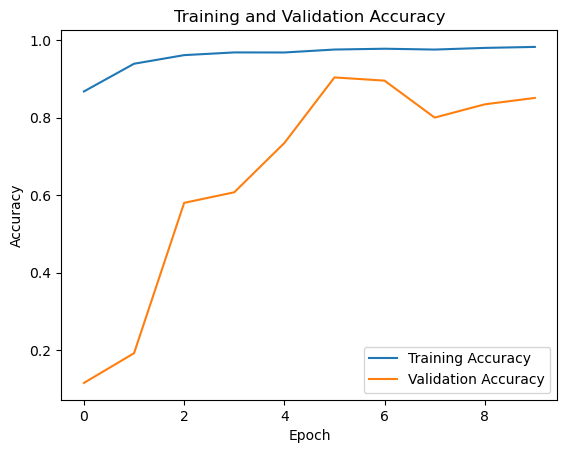

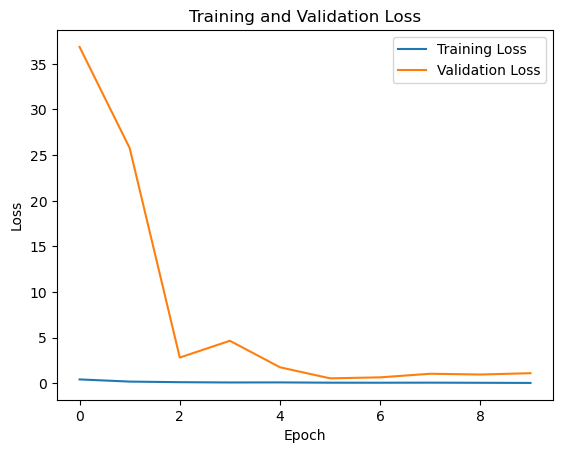

In [40]:
plotAccLoss(history_model_mobilenetv2)

In [43]:
evaluate_model(model_mobilenetv2, test_ds)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       318
           1       0.81      0.89      0.85       292
           2       0.78      0.81      0.79       264
           3       0.96      0.90      0.93       242
           4       0.99      0.57      0.73       308
           5       0.97      0.57      0.72       334
           6       0.98      0.72      0.83       265
           7       0.57      0.99      0.73       330
           8       1.00      1.00      1.00       300
           9       0.99      0.93      0.96       323

    accuracy                           0.83      2976
   macro avg       0.88      0.83      0.84      2976
weighted avg       0.88      0.83      0.83      2976

Accuracy: 0.834005376344086
Precision: 0.8769765844545073
Recall: 0.834005376344086
F1 Score: 0.8338583686500048


### MobileNet

In [24]:
from tensorflow.keras.applications.mobilenet import preprocess_input

# Define model architecture using MobileNet
model_mobilenet = models.Sequential([
    layers.Lambda(preprocess_input),  # Apply preprocess_input function
    # Load the pre-trained MobileNet model with weights from ImageNet
    tf.keras.applications.MobileNet(include_top=False, input_shape=(image_size, image_size, channels)),
    layers.GlobalAveragePooling2D(),  # Convert features to 1D vector
    layers.Dense(1024, activation='relu'),  # Add a dense layer
    layers.Dropout(0.5),  # Add dropout layer for regularization
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Freeze the pre-trained layers of MobileNet
model_mobilenet.layers[2].trainable = False

# Build the model
model_mobilenet.build(input_shape = input_shape)

# Compile the model
model_mobilenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_mobilenet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_9 (Lambda)           (None, 128, 128, 3)       0         
                                                                 
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_4   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 10)               

In [35]:
# Train the model
history_mobilenet = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    batch_size = batch_size,
    callbacks=[early_stopping],
    epochs=EPOCHS  # Adjust the number of epochs as needed
)

Epoch 1/10
732/732 [==============================] - 62s 82ms/step - loss: 0.3512 - accuracy: 0.8944 - val_loss: 0.3469 - val_accuracy: 0.9236
Epoch 2/10
732/732 [==============================] - 60s 82ms/step - loss: 0.1583 - accuracy: 0.9550 - val_loss: 0.1709 - val_accuracy: 0.9506
Epoch 3/10
732/732 [==============================] - 60s 82ms/step - loss: 0.1078 - accuracy: 0.9676 - val_loss: 0.4015 - val_accuracy: 0.8960
Epoch 4/10
732/732 [==============================] - 60s 82ms/step - loss: 0.0961 - accuracy: 0.9731 - val_loss: 0.1899 - val_accuracy: 0.9475
Epoch 5/10
732/732 [==============================] - 60s 82ms/step - loss: 0.0835 - accuracy: 0.9763 - val_loss: 0.1378 - val_accuracy: 0.9641
Epoch 6/10
732/732 [==============================] - 60s 82ms/step - loss: 0.0670 - accuracy: 0.9811 - val_loss: 0.0270 - val_accuracy: 0.9903
Epoch 7/10
732/732 [==============================] - 60s 82ms/step - loss: 0.0635 - accuracy: 0.9813 - val_loss: 0.0745 - val_accuracy:

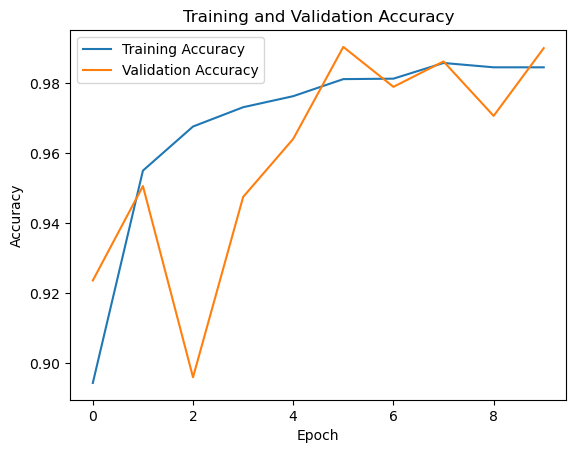

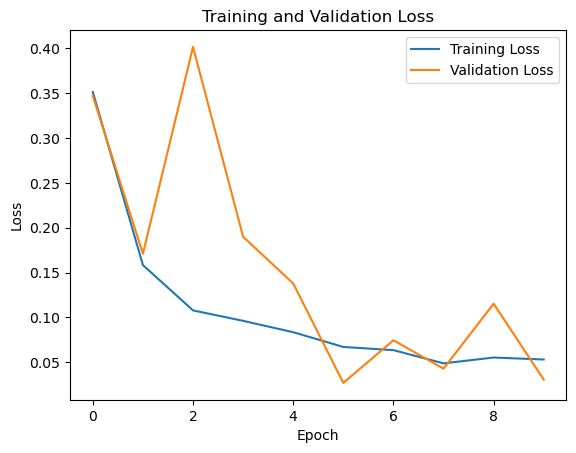

In [36]:
plotAccLoss(history_mobilenet)

In [37]:
evaluate_model(model_mobilenet, test_ds)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       318
           1       0.99      0.97      0.98       292
           2       0.99      0.98      0.98       264
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       308
           5       0.99      0.99      0.99       334
           6       0.99      0.99      0.99       265
           7       1.00      1.00      1.00       330
           8       1.00      1.00      1.00       300
           9       1.00      1.00      1.00       323

    accuracy                           0.99      2976
   macro avg       0.99      0.99      0.99      2976
weighted avg       0.99      0.99      0.99      2976

Accuracy: 0.9932795698924731
Precision: 0.9933386930706908
Recall: 0.9932795698924731
F1 Score: 0.9932757762220785


### EfficientNet B1

EfficientNet models expect their inputs to be float tensors of pixels with values in the [0-255] range. 
Source:https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet/preprocess_input

In [25]:
# Define model architecture using EfficientNetB1
model_efficientnetb1 = models.Sequential([
    #resize_and_rescale, #it does not require images to be normalized
    #data_augmentation,
    # Load the pre-trained EfficientNetB1 model with weights from ImageNet
    tf.keras.applications.EfficientNetB1(include_top=False, input_shape=(image_size,image_size,channels)),
    layers.GlobalAveragePooling2D(),  # Convert features to 1D vector
    layers.Dense(1024, activation='relu'),  # Add a dense layer
    layers.Dropout(0.5),  # Add dropout layer for regularization
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Freeze the pre-trained layers of EfficientNetB1
model_efficientnetb1.layers[2].trainable = False

# Build the model
model_efficientnetb1.build(input_shape=input_shape)

# Compile the model
model_efficientnetb1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_efficientnetb1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 4, 4, 1280)       6575239   
                                                                 
 global_average_pooling2d_5   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 1024)              1311744   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 10)                10250     
                                                                 
Total params: 7,897,233
Trainable params: 6,523,434
Non-trainable params: 1,373,799
____________________________________

In [46]:
# Train the model
history_model_efficientnetb1 = model_efficientnetb1.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[early_stopping],
    batch_size = batch_size,
    epochs= EPOCHS # Adjust the number of epochs as needed
)

Epoch 1/10
732/732 [==============================] - 191s 247ms/step - loss: 0.3336 - accuracy: 0.8939 - val_loss: 0.2938 - val_accuracy: 0.9143
Epoch 2/10
732/732 [==============================] - 179s 245ms/step - loss: 0.0918 - accuracy: 0.9713 - val_loss: 0.0589 - val_accuracy: 0.9800
Epoch 3/10
732/732 [==============================] - 180s 246ms/step - loss: 0.0704 - accuracy: 0.9781 - val_loss: 0.1798 - val_accuracy: 0.9468
Epoch 4/10
732/732 [==============================] - 180s 246ms/step - loss: 0.0491 - accuracy: 0.9856 - val_loss: 0.0541 - val_accuracy: 0.9848
Epoch 5/10
732/732 [==============================] - 180s 246ms/step - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.0310 - val_accuracy: 0.9903
Epoch 6/10
732/732 [==============================] - 179s 245ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0483 - val_accuracy: 0.9862
Epoch 7/10
732/732 [==============================] - 179s 245ms/step - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.0377 -

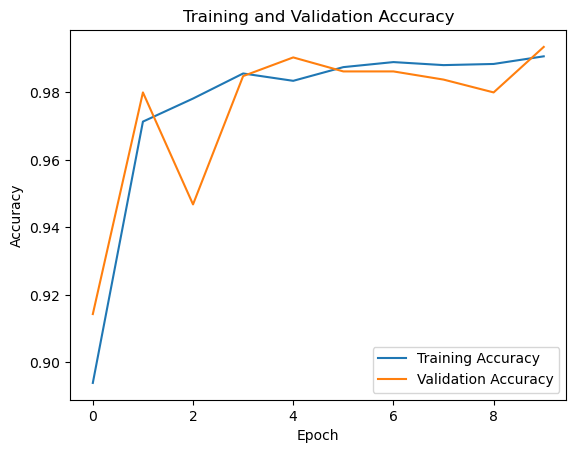

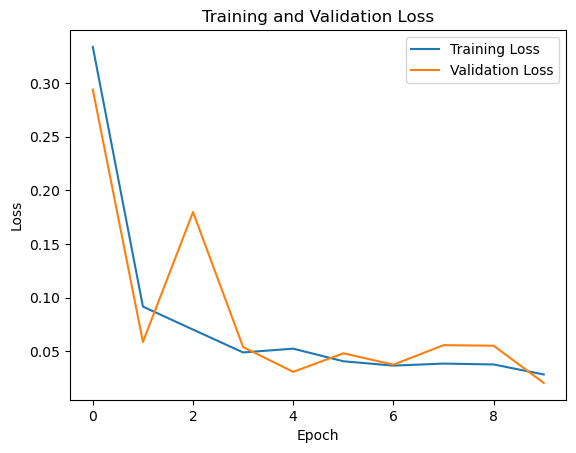

In [47]:
plotAccLoss(history_model_efficientnetb1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       0.98      0.99      0.98       292
           2       1.00      1.00      1.00       264
           3       0.98      1.00      0.99       242
           4       1.00      0.96      0.98       308
           5       1.00      0.99      0.99       334
           6       0.98      1.00      0.99       265
           7       1.00      1.00      1.00       330
           8       0.99      1.00      1.00       300
           9       1.00      1.00      1.00       323

    accuracy                           0.99      2976
   macro avg       0.99      0.99      0.99      2976
weighted avg       0.99      0.99      0.99      2976

Accuracy: 0.9929435483870968
Precision: 0.9930326687304997
Recall: 0.9929435483870968
F1 Score: 0.9929343448736567


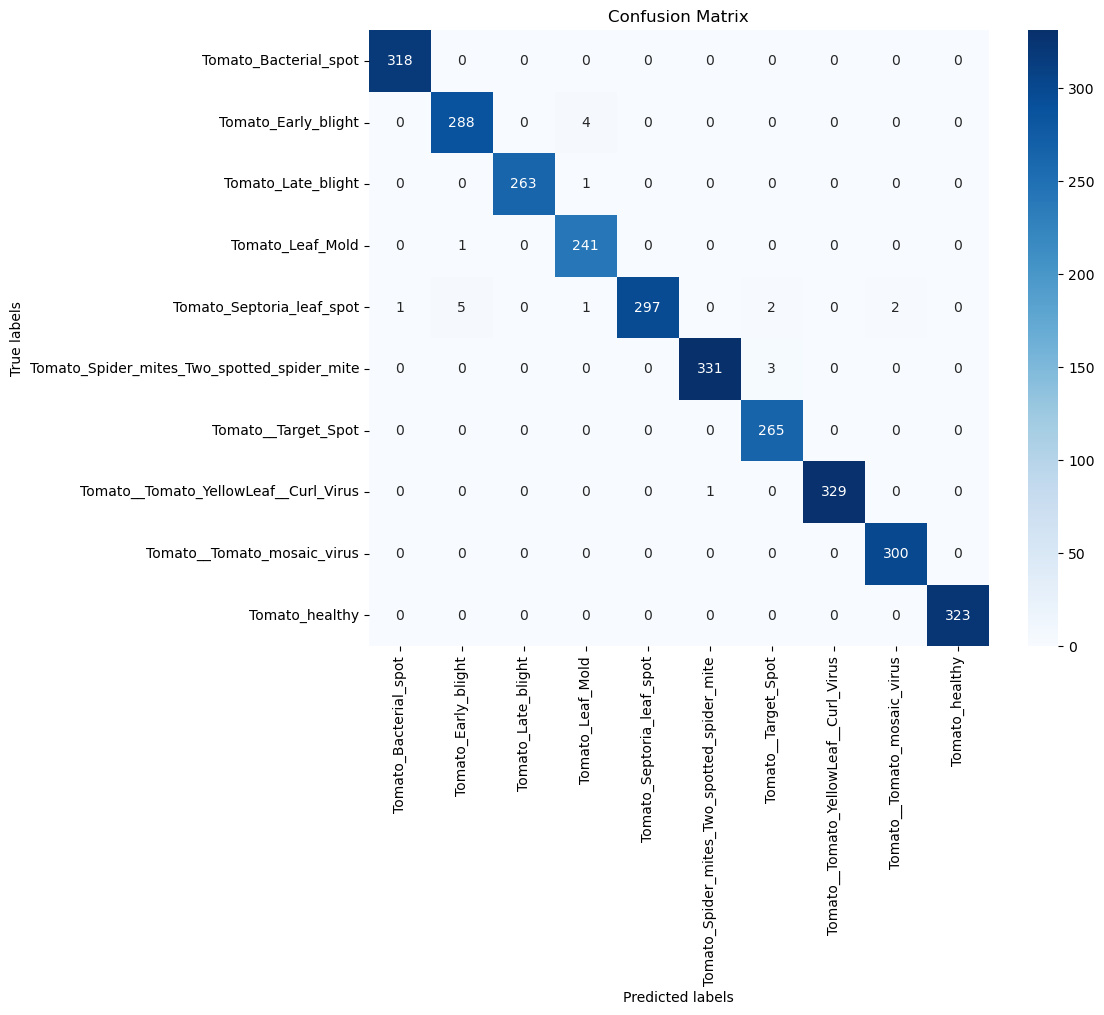

In [48]:
evaluate_model(model_efficientnetb1, test_ds)

### DenseNet201

In [26]:
from tensorflow.keras.applications.densenet import preprocess_input


# Define model architecture using DenseNet201
model_densenet201 = models.Sequential([
    layers.Lambda(preprocess_input),
    # Load the pre-trained DenseNet201 model with weights from ImageNet
    tf.keras.applications.DenseNet201(include_top=False, input_shape= (image_size,image_size,channels)),
    layers.GlobalAveragePooling2D(),  # Convert features to 1D vector
    layers.Dense(1024, activation='relu'),  # Add a dense layer
    layers.Dropout(0.5),  # Add dropout layer for regularization
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Freeze the pre-trained layers of DenseNet201
model_densenet201.layers[2].trainable = False

# Build the model
model_densenet201.build(input_shape = input_shape)

# Compile the model
model_densenet201.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_densenet201.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_10 (Lambda)          (None, 128, 128, 3)       0         
                                                                 
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 global_average_pooling2d_6   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 1024)              1967104   
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 10)                10250     
                                                      

In [56]:
EPOCHS=10
# Train the model
history_densenet201 = model_densenet201.fit(
    train_ds,
    validation_data=val_ds,
    batch_size = batch_size,
    callbacks=[early_stopping],
    epochs=EPOCHS  # Adjust the number of epochs as needed
)

Epoch 1/10
732/732 [==============================] - 266s 338ms/step - loss: 0.4905 - accuracy: 0.8519 - val_loss: 0.3431 - val_accuracy: 0.9091
Epoch 2/10
732/732 [==============================] - 244s 334ms/step - loss: 0.1991 - accuracy: 0.9373 - val_loss: 0.5258 - val_accuracy: 0.8673
Epoch 3/10
732/732 [==============================] - 245s 334ms/step - loss: 0.1497 - accuracy: 0.9529 - val_loss: 0.4841 - val_accuracy: 0.8614
Epoch 4/10
732/732 [==============================] - 245s 334ms/step - loss: 0.1508 - accuracy: 0.9568 - val_loss: 0.2175 - val_accuracy: 0.9340
Epoch 5/10
732/732 [==============================] - 245s 334ms/step - loss: 0.1164 - accuracy: 0.9647 - val_loss: 0.1594 - val_accuracy: 0.9513
Epoch 6/10
732/732 [==============================] - 244s 333ms/step - loss: 0.0990 - accuracy: 0.9705 - val_loss: 0.2859 - val_accuracy: 0.9209
Epoch 7/10
732/732 [==============================] - 244s 334ms/step - loss: 0.0952 - accuracy: 0.9718 - val_loss: 0.2704 -

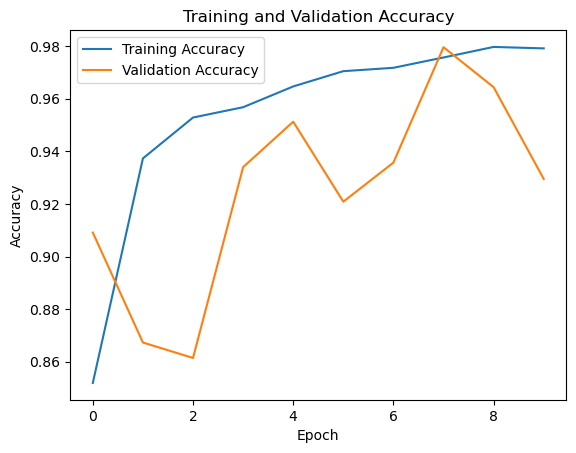

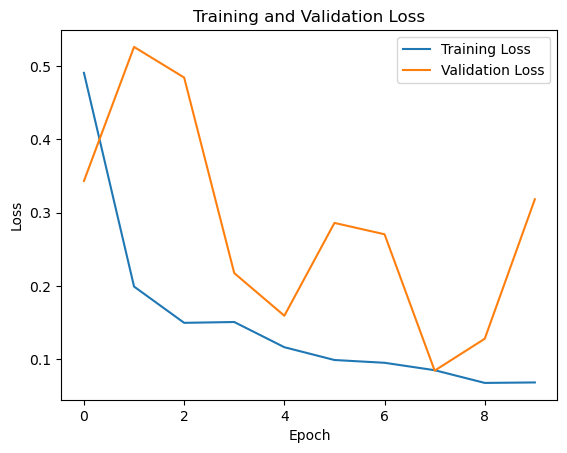

In [57]:
plotAccLoss(history_densenet201)

In [58]:
evaluate_model(model_densenet201, test_ds)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       318
           1       0.77      0.99      0.87       292
           2       0.87      0.97      0.92       264
           3       1.00      0.86      0.92       242
           4       0.90      0.86      0.88       308
           5       0.98      0.94      0.96       334
           6       0.96      0.93      0.95       265
           7       0.99      0.98      0.99       330
           8       0.92      1.00      0.96       300
           9       0.98      0.99      0.99       323

    accuracy                           0.93      2976
   macro avg       0.94      0.93      0.93      2976
weighted avg       0.94      0.93      0.93      2976

Accuracy: 0.9317876344086021
Precision: 0.9394306951029708
Recall: 0.9317876344086021
F1 Score: 0.9320137795559044


### Xception model

In [27]:
from tensorflow.keras.applications.xception import preprocess_input

# Define model architecture using Xception
model_xception = models.Sequential([
    layers.Lambda(preprocess_input),
    # Load the pre-trained Xception model with weights from ImageNet
    tf.keras.applications.Xception(include_top=False, input_shape=(image_size, image_size, channels)),
    layers.GlobalAveragePooling2D(),  # Convert features to 1D vector
    layers.Dense(1024, activation='relu'),  # Add a dense layer
    layers.Dropout(0.5),  # Add dropout layer for regularization
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Freeze the pre-trained layers of Xception
model_xception.layers[2].trainable = False

# Build the model
model_xception.build(input_shape=input_shape)

# Compile the model
model_xception.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_xception.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_11 (Lambda)          (None, 128, 128, 3)       0         
                                                                 
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_14 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 10)                10250     
                                                      

In [68]:
# Train the model
history_model_xception = model_xception.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[early_stopping],
    batch_size = batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

Epoch 1/10
732/732 [==============================] - 207s 277ms/step - loss: 0.5658 - accuracy: 0.8235 - val_loss: 0.2414 - val_accuracy: 0.9302
Epoch 2/10
732/732 [==============================] - 204s 279ms/step - loss: 0.1564 - accuracy: 0.9535 - val_loss: 0.1210 - val_accuracy: 0.9627
Epoch 3/10
732/732 [==============================] - 204s 279ms/step - loss: 0.0933 - accuracy: 0.9720 - val_loss: 0.0747 - val_accuracy: 0.9789
Epoch 4/10
732/732 [==============================] - 204s 279ms/step - loss: 0.0734 - accuracy: 0.9777 - val_loss: 0.0246 - val_accuracy: 0.9927
Epoch 5/10
732/732 [==============================] - 204s 278ms/step - loss: 0.0680 - accuracy: 0.9807 - val_loss: 0.3937 - val_accuracy: 0.9081
Epoch 6/10
732/732 [==============================] - 204s 278ms/step - loss: 0.0507 - accuracy: 0.9840 - val_loss: 0.2480 - val_accuracy: 0.9513
Epoch 7/10
732/732 [==============================] - 204s 278ms/step - loss: 0.0524 - accuracy: 0.9847 - val_loss: 0.0760 -

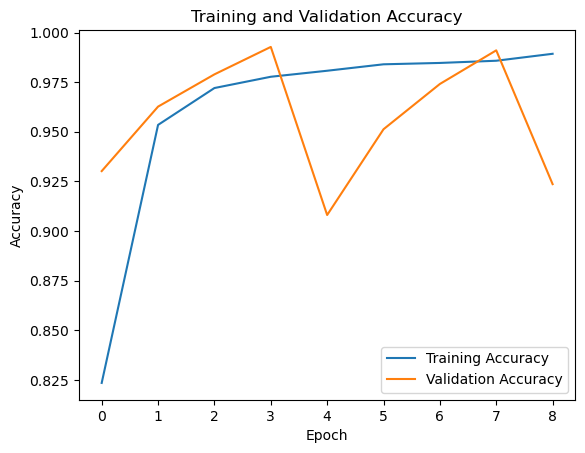

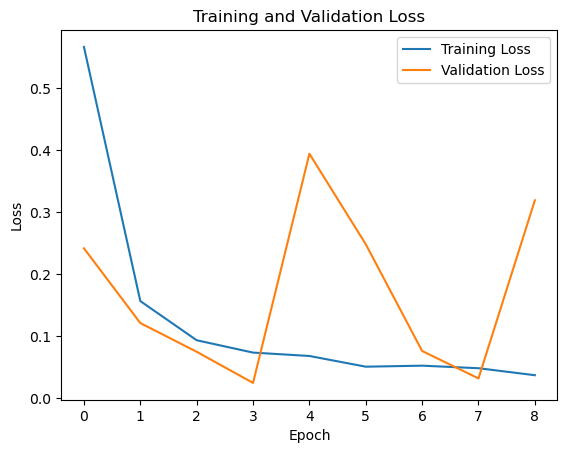

In [69]:
plotAccLoss(history_model_xception)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       318
           1       0.96      1.00      0.98       292
           2       1.00      0.99      0.99       264
           3       0.99      1.00      0.99       242
           4       1.00      0.99      0.99       308
           5       0.99      1.00      1.00       334
           6       1.00      0.97      0.98       265
           7       1.00      1.00      1.00       330
           8       1.00      1.00      1.00       300
           9       1.00      1.00      1.00       323

    accuracy                           0.99      2976
   macro avg       0.99      0.99      0.99      2976
weighted avg       0.99      0.99      0.99      2976

Accuracy: 0.9926075268817204
Precision: 0.9927779905968506
Recall: 0.9926075268817204
F1 Score: 0.9926076387364668


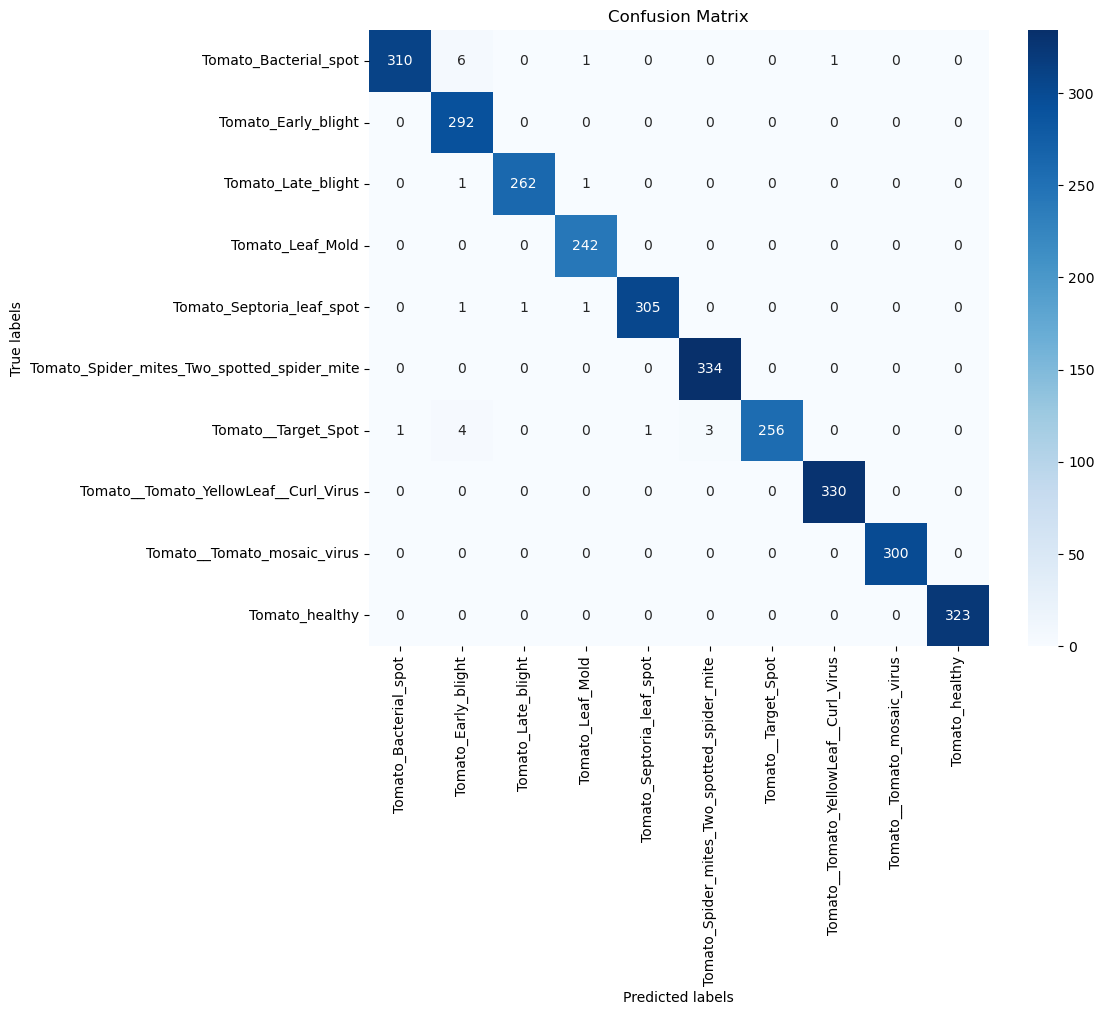

In [70]:
evaluate_model(model_xception, test_ds)

## Inception V3

In [28]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Define model architecture using InceptionV3
model_inception = models.Sequential([
    layers.Lambda(preprocess_input),
    # Load the pre-trained InceptionV3 model with weights from ImageNet
    tf.keras.applications.InceptionV3(include_top=False, input_shape=(image_size, image_size, channels)),
    layers.GlobalAveragePooling2D(),  # Convert features to 1D vector
    layers.Dense(1024, activation='relu'),  # Add a dense layer
    layers.Dropout(0.5),  # Add dropout layer for regularization
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Freeze the pre-trained layers of InceptionV3
model_inception.layers[2].trainable = False

#Build the model
model_inception.build(input_shape = input_shape)

# Compile the model
model_inception.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_inception.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_12 (Lambda)          (None, 128, 128, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_average_pooling2d_8   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_16 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 10)                10250     
                                                      

In [72]:
# Train the model
history_inception = model_inception.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[early_stopping],
    batch_size = batch_size,
    epochs= EPOCHS  # Adjust the number of epochs as needed
)

Epoch 1/10
732/732 [==============================] - 112s 143ms/step - loss: 0.8643 - accuracy: 0.7293 - val_loss: 0.4447 - val_accuracy: 0.8597
Epoch 2/10
732/732 [==============================] - 103s 140ms/step - loss: 0.2960 - accuracy: 0.9094 - val_loss: 0.3212 - val_accuracy: 0.9153
Epoch 3/10
732/732 [==============================] - 105s 143ms/step - loss: 0.1989 - accuracy: 0.9394 - val_loss: 0.3198 - val_accuracy: 0.9064
Epoch 4/10
732/732 [==============================] - 106s 144ms/step - loss: 0.1720 - accuracy: 0.9482 - val_loss: 0.3677 - val_accuracy: 0.8901
Epoch 5/10
732/732 [==============================] - 105s 143ms/step - loss: 0.1408 - accuracy: 0.9579 - val_loss: 0.5877 - val_accuracy: 0.8411
Epoch 6/10
732/732 [==============================] - 105s 143ms/step - loss: 0.1062 - accuracy: 0.9677 - val_loss: 0.8957 - val_accuracy: 0.8345
Epoch 7/10
732/732 [==============================] - 103s 141ms/step - loss: 0.1114 - accuracy: 0.9648 - val_loss: 3.3049 -

In [73]:
plotAccLoss(history_inception)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       318
           1       0.84      0.98      0.91       292
           2       0.99      0.91      0.95       264
           3       0.98      0.99      0.99       242
           4       0.92      0.96      0.94       308
           5       1.00      0.82      0.90       334
           6       0.97      0.97      0.97       265
           7       0.91      1.00      0.95       330
           8       0.86      1.00      0.92       300
           9       0.99      0.99      0.99       323

    accuracy                           0.94      2976
   macro avg       0.95      0.94      0.94      2976
weighted avg       0.95      0.94      0.94      2976

Accuracy: 0.9398521505376344
Precision: 0.9459705674404908
Recall: 0.9398521505376344
F1 Score: 0.9392727442768922


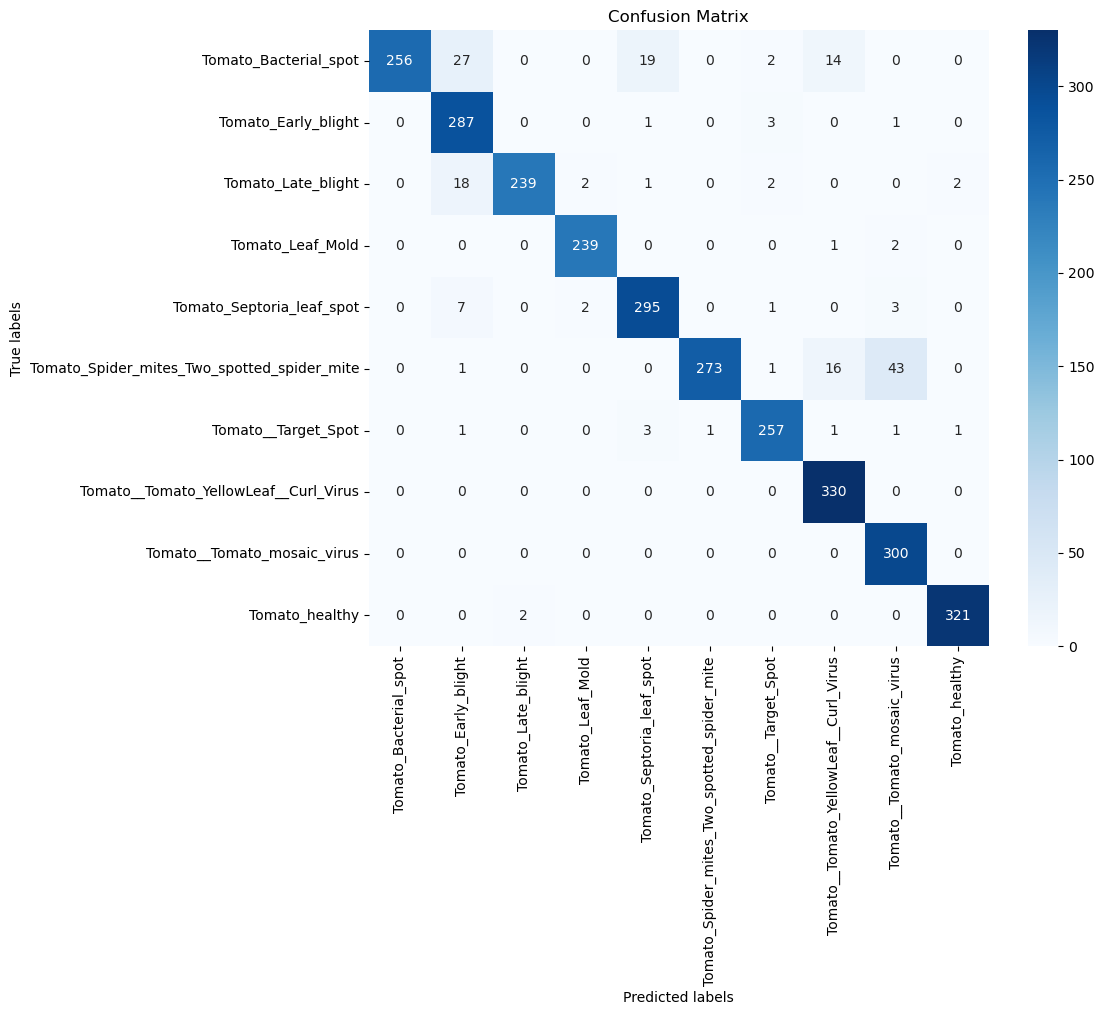

In [74]:
evaluate_model(model_inception, test_ds)

### ResNet50 Model

In [29]:
from tensorflow.keras.applications.resnet import preprocess_input

# Define model architecture using ResNet50
model_resnet50 = models.Sequential([
    layers.Lambda(preprocess_input),
    # Load the pre-trained ResNet50 model with weights from ImageNet
    tf.keras.applications.ResNet50(include_top=False, input_shape=(image_size, image_size, channels)),
    layers.GlobalAveragePooling2D(),  # Convert features to 1D vector
    layers.Dense(1024, activation='relu'),  # Add a dense layer
    layers.Dropout(0.5),  # Add dropout layer for regularization
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Freeze the pre-trained layers of ResNet50
model_resnet50.layers[2].trainable = False

# Build the model
model_resnet50.build(input_shape=input_shape)

# Compile the model
model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_resnet50.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_13 (Lambda)          (None, 128, 128, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_9   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_18 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 10)                10250     
                                                      

In [76]:
# Train the model
history_model_resnet50 = model_resnet50.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[early_stopping],
    batch_size = batch_size,
    epochs= EPOCHS  # Adjust the number of epochs as needed
)

Epoch 1/10
732/732 [==============================] - 143s 188ms/step - loss: 0.5140 - accuracy: 0.8440 - val_loss: 0.7764 - val_accuracy: 0.7547
Epoch 2/10
732/732 [==============================] - 137s 188ms/step - loss: 0.2157 - accuracy: 0.9319 - val_loss: 0.3978 - val_accuracy: 0.8836
Epoch 3/10
732/732 [==============================] - 138s 188ms/step - loss: 0.1673 - accuracy: 0.9447 - val_loss: 0.4179 - val_accuracy: 0.8770
Epoch 4/10
732/732 [==============================] - 138s 188ms/step - loss: 0.1203 - accuracy: 0.9615 - val_loss: 0.3674 - val_accuracy: 0.8804
Epoch 5/10
732/732 [==============================] - 138s 188ms/step - loss: 0.1057 - accuracy: 0.9661 - val_loss: 0.2757 - val_accuracy: 0.9133
Epoch 6/10
732/732 [==============================] - 138s 188ms/step - loss: 0.0844 - accuracy: 0.9726 - val_loss: 0.0648 - val_accuracy: 0.9789
Epoch 7/10
732/732 [==============================] - 138s 188ms/step - loss: 0.0966 - accuracy: 0.9707 - val_loss: 0.1576 -

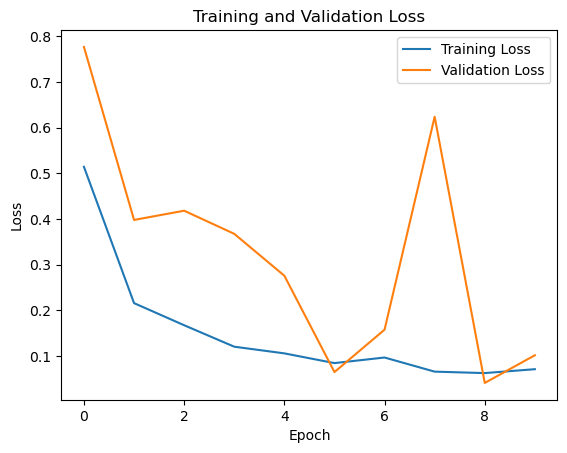

In [77]:
plotAccLoss(history_model_resnet50)

In [78]:
evaluate_model(model_resnet50, test_ds)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       318
           1       0.90      0.98      0.93       292
           2       0.99      0.90      0.94       264
           3       1.00      0.96      0.98       242
           4       0.98      0.97      0.98       308
           5       0.99      0.98      0.98       334
           6       0.95      0.98      0.97       265
           7       1.00      0.98      0.99       330
           8       1.00      1.00      1.00       300
           9       1.00      1.00      1.00       323

    accuracy                           0.98      2976
   macro avg       0.98      0.97      0.98      2976
weighted avg       0.98      0.98      0.98      2976

Accuracy: 0.9761424731182796
Precision: 0.9771798623690484
Recall: 0.9761424731182796
F1 Score: 0.9762244297177207


### VGG19 Model

In [30]:
from tensorflow.keras.applications.vgg19 import preprocess_input

# Define model architecture using VGG19
model_vgg19 = models.Sequential([
    layers.Lambda(preprocess_input),
    # Load the pre-trained VGG19 model with weights from ImageNet
    tf.keras.applications.VGG19(include_top=False, input_shape=(image_size, image_size, channels), weights="imagenet" ),
    layers.GlobalAveragePooling2D(),  # Convert features to 1D vector
    layers.Dense(1024, activation='relu'),  # Add a dense layer
    layers.Dropout(0.5),  # Add dropout layer for regularization
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax activation
])

# Freeze the pre-trained layers of VGG19
model_vgg19.layers[2].trainable = False

# Build the model
model_vgg19.build(input_shape=input_shape)

# Compile the model
model_vgg19.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_vgg19.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_14 (Lambda)          (None, 128, 128, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 global_average_pooling2d_10  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_20 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 10)                10250     
                                                     

In [82]:
# Train the model
history_model_vgg19 = model_vgg19.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[early_stopping],
    batch_size = batch_size,
    epochs= EPOCHS  # Adjust the number of epochs as needed
)

Epoch 1/10
732/732 [==============================] - 190s 258ms/step - loss: 1.9414 - accuracy: 0.2774 - val_loss: 1.7480 - val_accuracy: 0.3379
Epoch 2/10
732/732 [==============================] - 189s 258ms/step - loss: 1.5059 - accuracy: 0.4363 - val_loss: 1.1366 - val_accuracy: 0.5978
Epoch 3/10
732/732 [==============================] - 189s 258ms/step - loss: 1.0832 - accuracy: 0.6010 - val_loss: 0.8605 - val_accuracy: 0.6707
Epoch 4/10
732/732 [==============================] - 188s 257ms/step - loss: 0.8609 - accuracy: 0.6819 - val_loss: 0.6573 - val_accuracy: 0.7529
Epoch 5/10
732/732 [==============================] - 188s 257ms/step - loss: 0.7949 - accuracy: 0.7129 - val_loss: 0.6899 - val_accuracy: 0.7450
Epoch 6/10
732/732 [==============================] - 188s 257ms/step - loss: 0.6896 - accuracy: 0.7522 - val_loss: 0.5303 - val_accuracy: 0.8051
Epoch 7/10
732/732 [==============================] - 188s 257ms/step - loss: 0.6268 - accuracy: 0.7747 - val_loss: 0.5191 -

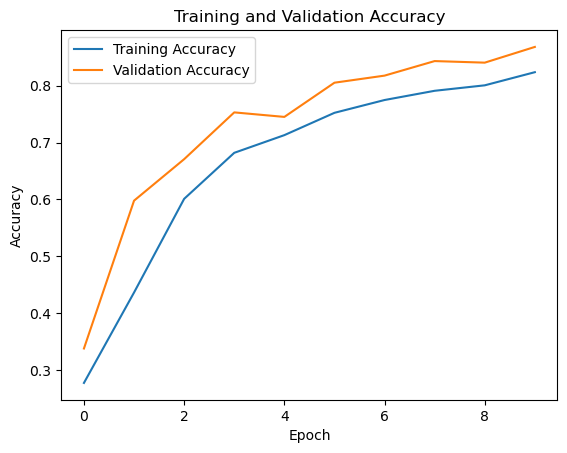

In [83]:
plotAccLoss(history_model_vgg19)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       318
           1       0.84      0.74      0.79       292
           2       0.85      0.69      0.76       264
           3       0.79      0.86      0.82       242
           4       0.78      0.85      0.81       308
           5       0.93      0.78      0.85       334
           6       0.70      0.83      0.76       265
           7       0.97      0.95      0.96       330
           8       0.94      0.96      0.95       300
           9       0.98      0.98      0.98       323

    accuracy                           0.86      2976
   macro avg       0.86      0.86      0.86      2976
weighted avg       0.87      0.86      0.86      2976

Accuracy: 0.8622311827956989
Precision: 0.8671207730265328
Recall: 0.8622311827956989
F1 Score: 0.8617164011788776


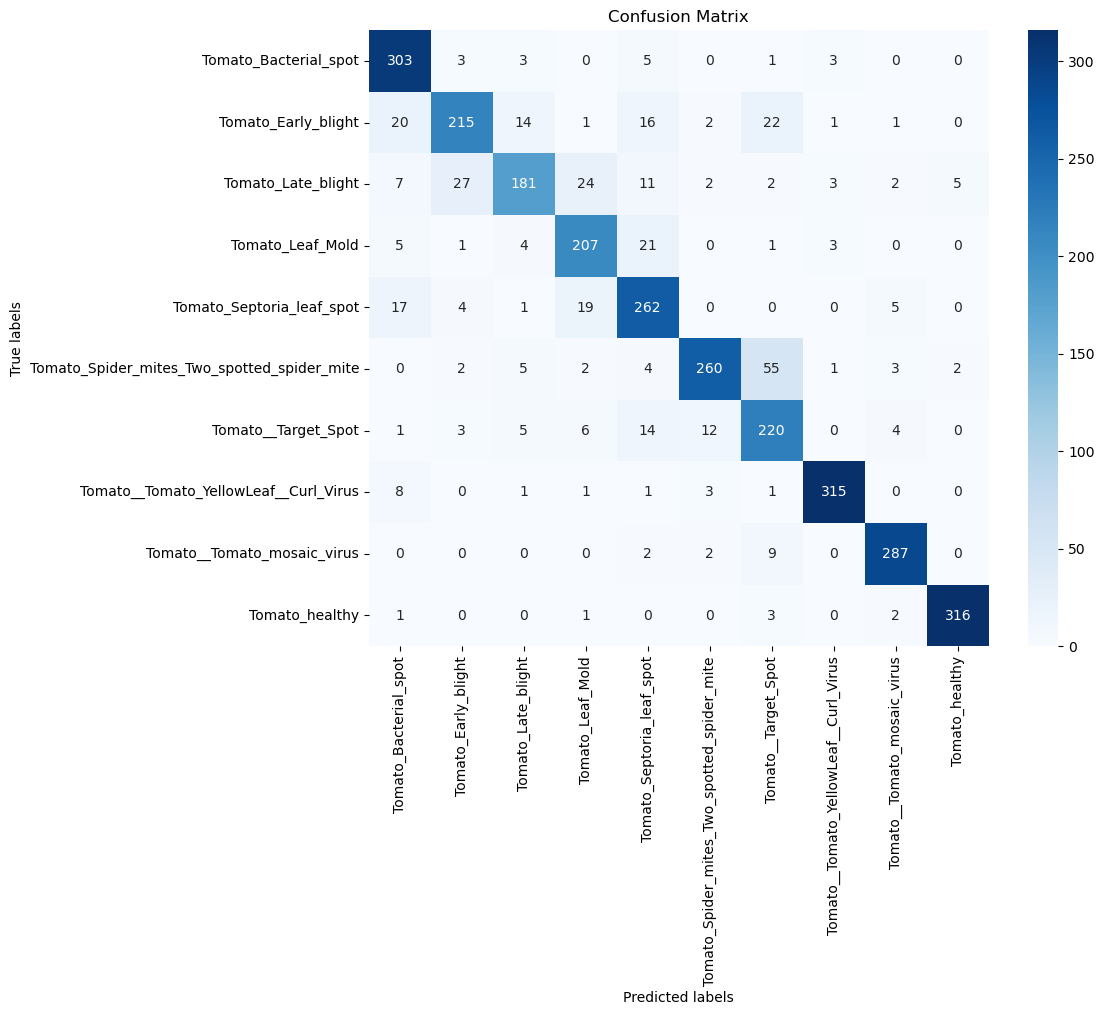

In [84]:
evaluate_model(model_vgg19, test_ds)

It shows that VGG19 needed either more data or epochs to generalize to our dataset. As it's huge, it seems that its ability to shift adaptively becomes impaired.

### Data Normalization and Augmentation

In [122]:
#Pre-processing for my own models
# Resizing images so that all images are of a standard size, rescaling for normalization so that all pixels are between 0 
# and 1
resize_and_rescale=tf.keras.Sequential([
    #tf.keras.layers.experimental.preprocessing.Resizing(image_size, image_size), #images are 128x128
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])
# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

input_shape = (batch_size, image_size, image_size, channels)

EPOCHS=30

1. Get the total number of parameters in the model.
2. Each parameter is typically represented using a 32-bit floating-point number (4 bytes).
3. Multiply the total number of parameters by 4 to get the size in bytes.
4. Convert the size from bytes to megabytes by dividing by 1024*1024.

In [10]:
#function to obtain model size
def get_model_size(model):
    # Calculate the total number of parameters
    total_parameters = np.sum([np.prod(w.shape) for w in model.weights])

    # Calculate the size of the model in bytes
    model_size_bytes = 4 * total_parameters

    # Convert size to megabytes
    model_size_mb = model_size_bytes / (1024 * 1024)

    print("Model size: {:.2f} MB".format(model_size_mb))

# Iterative Model Number 1
Simple model with 2 convolution layers, 2 MaxPooling layers followed by a flatten layer to transform tensors intto 1D to go through the output layer.

In [106]:
# Define model architecture
model_V1 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    1layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(len(class_names), activation='softmax')  # Assuming number of output classes matches length of class names
])

# Build the model
model_V1.build(input_shape = input_shape)

# Compile the model
model_V1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_V1.summary()

# Get model Size
get_model_size(model_V1)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_39 (Sequential)  (32, 128, 128, 3)         0         
                                                                 
 sequential_40 (Sequential)  (32, 128, 128, 3)         0         
                                                                 
 conv2d_143 (Conv2D)         (32, 126, 126, 64)        1792      
                                                                 
 max_pooling2d_41 (MaxPoolin  (32, 63, 63, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_144 (Conv2D)         (32, 61, 61, 64)          36928     
                                                                 
 max_pooling2d_42 (MaxPoolin  (32, 30, 30, 64)         0         
 g2D)                                                

In [107]:
# Model training
history_model_V1=model_V1.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=batch_size,
    callbacks=[early_stopping],
    validation_data=val_ds
)

Epoch 1/30
732/732 [==============================] - 28s 37ms/step - loss: 1.4201 - accuracy: 0.4911 - val_loss: 0.9582 - val_accuracy: 0.6545
Epoch 2/30
732/732 [==============================] - 27s 37ms/step - loss: 0.8252 - accuracy: 0.7087 - val_loss: 0.7645 - val_accuracy: 0.7326
Epoch 3/30
732/732 [==============================] - 27s 37ms/step - loss: 0.6442 - accuracy: 0.7752 - val_loss: 0.7672 - val_accuracy: 0.7460
Epoch 4/30
732/732 [==============================] - 27s 37ms/step - loss: 0.5689 - accuracy: 0.8035 - val_loss: 0.5253 - val_accuracy: 0.8131
Epoch 5/30
732/732 [==============================] - 27s 37ms/step - loss: 0.5329 - accuracy: 0.8136 - val_loss: 0.5727 - val_accuracy: 0.7985
Epoch 6/30
732/732 [==============================] - 27s 37ms/step - loss: 0.4892 - accuracy: 0.8330 - val_loss: 0.4918 - val_accuracy: 0.8241
Epoch 7/30
732/732 [==============================] - 27s 37ms/step - loss: 0.4681 - accuracy: 0.8380 - val_loss: 0.4272 - val_accuracy:

In [108]:
plotAccLoss(history_model_V1) 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       318
           1       0.84      0.76      0.80       292
           2       0.79      0.80      0.79       264
           3       0.90      0.68      0.77       242
           4       0.74      0.84      0.79       308
           5       0.87      0.69      0.77       334
           6       0.70      0.89      0.78       265
           7       0.91      0.92      0.91       330
           8       0.92      1.00      0.96       300
           9       0.91      0.99      0.95       323

    accuracy                           0.85      2976
   macro avg       0.85      0.84      0.84      2976
weighted avg       0.85      0.85      0.84      2976

Accuracy: 0.8461021505376344
Precision: 0.8521945572765918
Recall: 0.8461021505376344
F1 Score: 0.8445985244616221


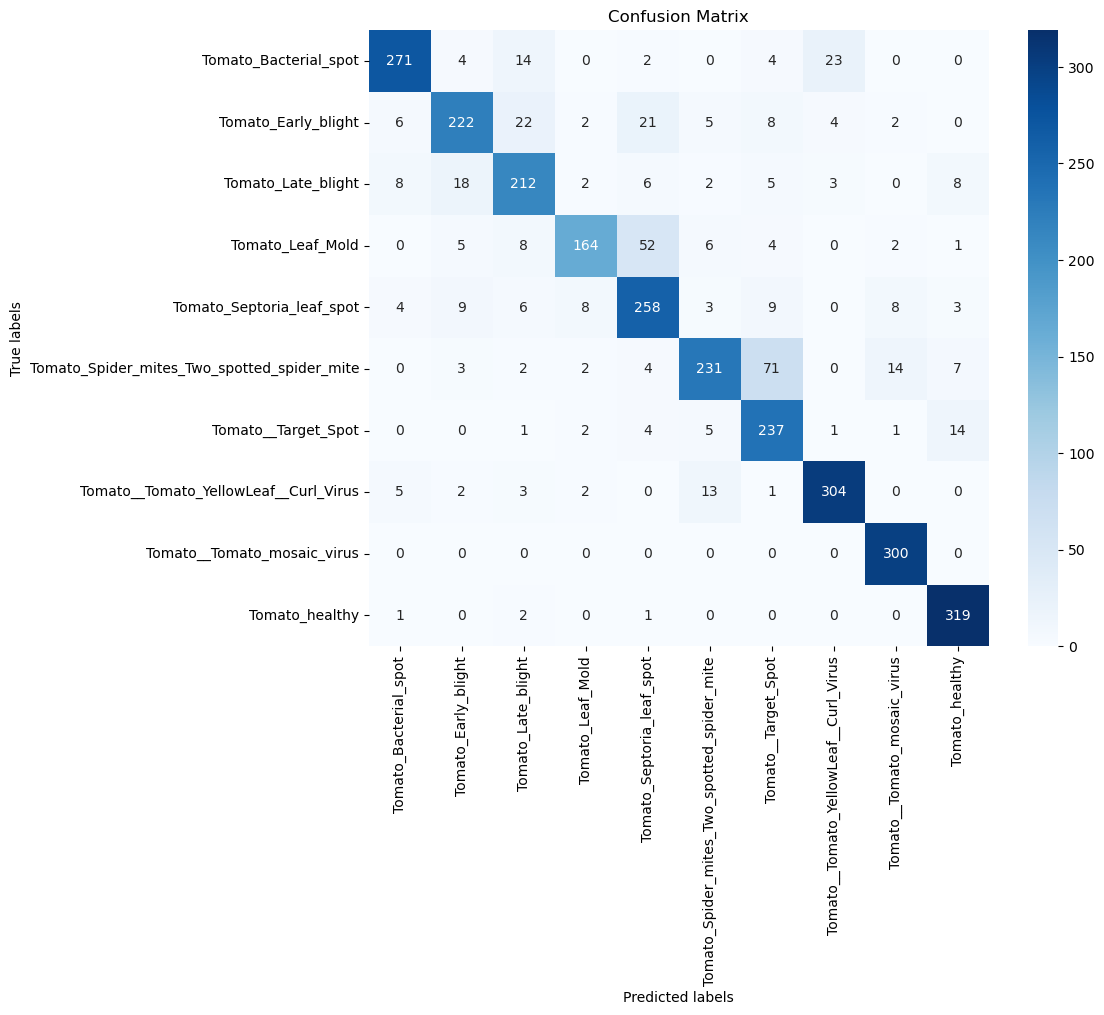

In [109]:
evaluate_model(model_V1, test_ds) 

# Iterative Model Number 2 - Larger Model

In [117]:
# Define model architecture
model_V25 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Assuming number of output classes matches length of class names
])

# Build the model
model_V25.build(input_shape = input_shape)

# Compile the model
model_V25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_V25.summary()

# Get model Size
get_model_size(model_V25)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_44 (Sequential)  (32, 128, 128, 3)         0         
                                                                 
 sequential_45 (Sequential)  (32, 128, 128, 3)         0         
                                                                 
 conv2d_152 (Conv2D)         (32, 126, 126, 32)        896       
                                                                 
 max_pooling2d_50 (MaxPoolin  (32, 63, 63, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_153 (Conv2D)         (32, 61, 61, 64)          18496     
                                                                 
 max_pooling2d_51 (MaxPoolin  (32, 30, 30, 64)         0         
 g2D)                                                

In [118]:
# Model training
history_model_V25=model_V25.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=batch_size,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 1/30
732/732 [==============================] - 21s 27ms/step - loss: 1.6754 - accuracy: 0.3900 - val_loss: 1.0672 - val_accuracy: 0.6016
Epoch 2/30
732/732 [==============================] - 20s 27ms/step - loss: 0.9913 - accuracy: 0.6478 - val_loss: 0.5871 - val_accuracy: 0.8106
Epoch 3/30
732/732 [==============================] - 20s 27ms/step - loss: 0.8114 - accuracy: 0.7068 - val_loss: 0.4856 - val_accuracy: 0.8200
Epoch 4/30
732/732 [==============================] - 20s 27ms/step - loss: 0.7309 - accuracy: 0.7409 - val_loss: 0.5335 - val_accuracy: 0.8041
Epoch 5/30
732/732 [==============================] - 20s 27ms/step - loss: 0.6760 - accuracy: 0.7610 - val_loss: 0.3703 - val_accuracy: 0.8683
Epoch 6/30
732/732 [==============================] - 20s 27ms/step - loss: 0.6203 - accuracy: 0.7806 - val_loss: 0.4406 - val_accuracy: 0.8497
Epoch 7/30
732/732 [==============================] - 20s 27ms/step - loss: 0.5675 - accuracy: 0.7979 - val_loss: 0.3461 - val_accuracy:

In [119]:
plotAccLoss(history_model_V25)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       318
           1       0.92      0.95      0.93       292
           2       0.95      0.93      0.94       264
           3       0.98      0.94      0.96       242
           4       0.91      0.95      0.93       308
           5       0.98      0.87      0.93       334
           6       0.92      0.94      0.93       265
           7       0.97      0.99      0.98       330
           8       0.95      1.00      0.97       300
           9       0.96      1.00      0.98       323

    accuracy                           0.95      2976
   macro avg       0.95      0.95      0.95      2976
weighted avg       0.95      0.95      0.95      2976

Accuracy: 0.9512768817204301
Precision: 0.9521426438279615
Recall: 0.9512768817204301
F1 Score: 0.951068335115979


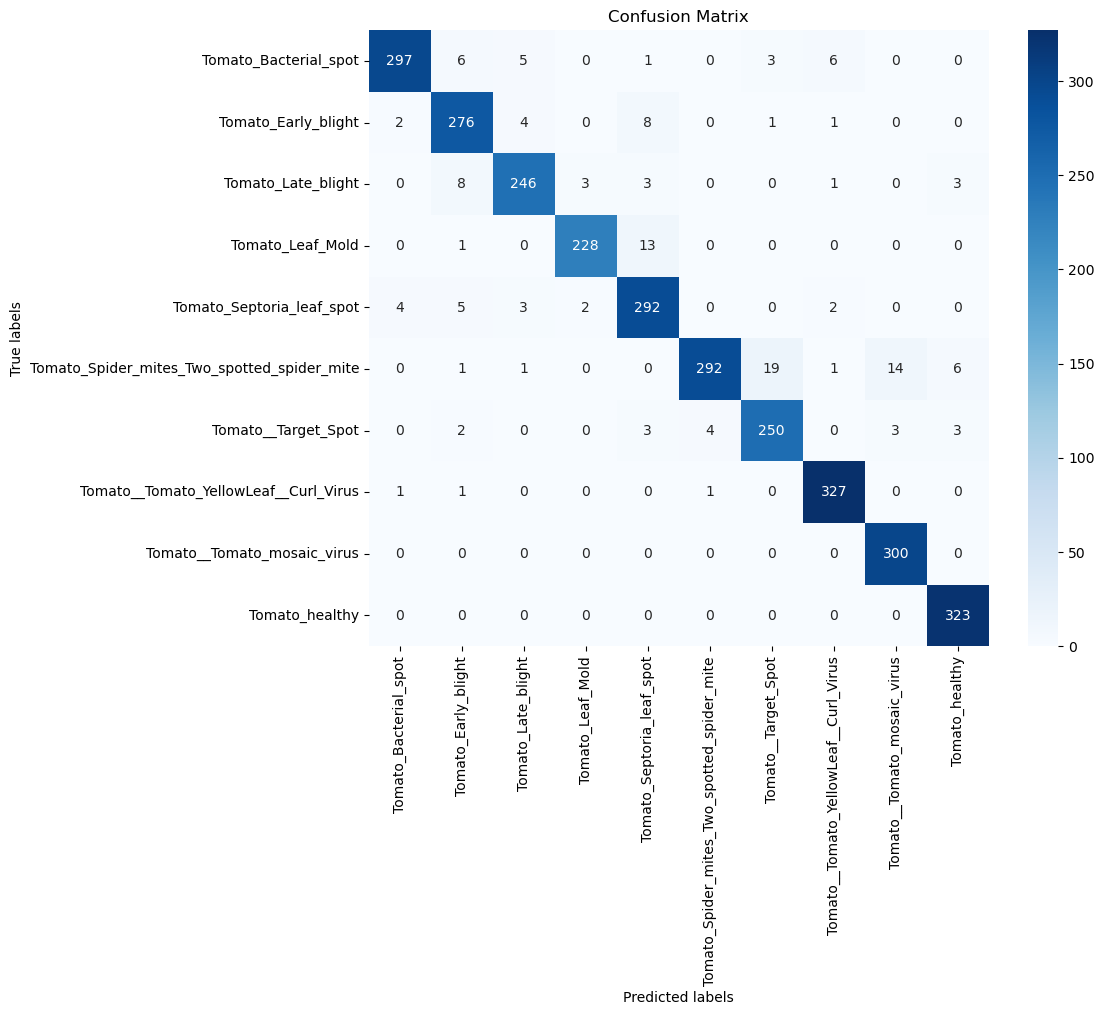

In [120]:
evaluate_model(model_V25, test_ds) 

Those figures are respectable for such little training. They beat some of the larger models while being several times smaller. Let's try to increase the figure a bit. 

# Iterative Model Number 3
This is additional layer with greatest number of filters applied towards input as models learn better towards the input than the output, thus, in decreaasing order.

In [135]:
# Define model architecture
model_V3_1 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Assuming number of output classes matches length of class names
])


# Build the model
model_V3_1.build(input_shape = input_shape)

# Compile the model
model_V3_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_V3_1.summary()

# Get model Size
get_model_size(model_V3_1)

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_48 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 sequential_49 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_208 (Conv2D)         (32, 126, 126, 256)       7168      
                                                                 
 max_pooling2d_106 (MaxPooli  (32, 63, 63, 256)        0         
 ng2D)                                                           
                                                                 
 conv2d_209 (Conv2D)         (32, 61, 61, 128)         295040    
                                                                 
 max_pooling2d_107 (MaxPooli  (32, 30, 30, 128)        0         
 ng2D)                                               

In [136]:
# Model training
history_model_V3_1=model_V3_1.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=batch_size,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 1/30
732/732 [==============================] - 91s 121ms/step - loss: 2.0445 - accuracy: 0.2517 - val_loss: 1.6253 - val_accuracy: 0.4039
Epoch 2/30
732/732 [==============================] - 89s 121ms/step - loss: 1.5052 - accuracy: 0.4539 - val_loss: 1.1168 - val_accuracy: 0.5878
Epoch 3/30
732/732 [==============================] - 88s 121ms/step - loss: 1.0865 - accuracy: 0.6107 - val_loss: 0.7029 - val_accuracy: 0.7429
Epoch 4/30
732/732 [==============================] - 89s 121ms/step - loss: 0.8584 - accuracy: 0.6966 - val_loss: 0.6311 - val_accuracy: 0.7636
Epoch 5/30
732/732 [==============================] - 89s 121ms/step - loss: 0.7140 - accuracy: 0.7488 - val_loss: 1.0062 - val_accuracy: 0.6724
Epoch 6/30
732/732 [==============================] - 89s 121ms/step - loss: 0.6479 - accuracy: 0.7705 - val_loss: 0.4215 - val_accuracy: 0.8462
Epoch 7/30
732/732 [==============================] - 88s 121ms/step - loss: 0.5739 - accuracy: 0.8028 - val_loss: 0.5986 - val_ac

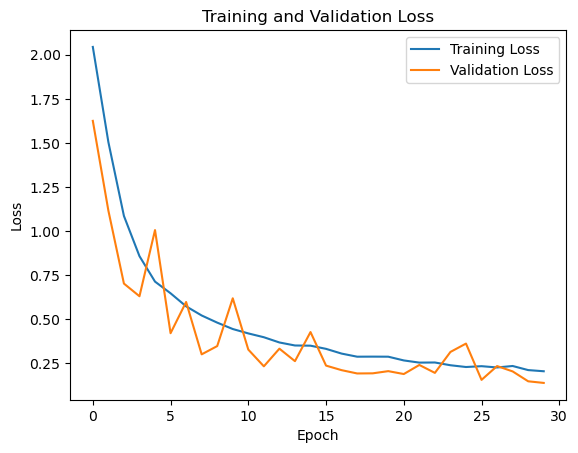

In [137]:
plotAccLoss(history_model_V3_1)

In [138]:
evaluate_model(model_V3_1, test_ds)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       318
           1       0.93      0.95      0.94       292
           2       0.91      0.95      0.93       264
           3       0.94      0.99      0.96       242
           4       0.96      0.87      0.91       308
           5       0.94      0.93      0.93       334
           6       0.94      0.89      0.91       265
           7       0.96      0.98      0.97       330
           8       0.96      1.00      0.98       300
           9       0.98      0.98      0.98       323

    accuracy                           0.95      2976
   macro avg       0.95      0.95      0.95      2976
weighted avg       0.95      0.95      0.95      2976

Accuracy: 0.9475806451612904
Precision: 0.9478300943737955
Recall: 0.9475806451612904
F1 Score: 0.9472096087551215


In [148]:
# Define model architecture
model_V3_3 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Assuming number of output classes matches length of class names
])


# Build the model
model_V3_3.build(input_shape = input_shape)

# Compile the model
model_V3_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_V3_3.summary()

# Get model Size
get_model_size(model_V3_3)

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_48 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 sequential_49 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_218 (Conv2D)         (32, 126, 126, 256)       7168      
                                                                 
 max_pooling2d_122 (MaxPooli  (32, 63, 63, 256)        0         
 ng2D)                                                           
                                                                 
 conv2d_219 (Conv2D)         (32, 61, 61, 128)         295040    
                                                                 
 max_pooling2d_123 (MaxPooli  (32, 30, 30, 128)        0         
 ng2D)                                               

In [149]:
# Model training
history_model_V3_3=model_V3_3.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=batch_size,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 1/30
732/732 [==============================] - 90s 121ms/step - loss: 1.9772 - accuracy: 0.2494 - val_loss: 1.6597 - val_accuracy: 0.3746
Epoch 2/30
732/732 [==============================] - 89s 121ms/step - loss: 1.5190 - accuracy: 0.4239 - val_loss: 1.1822 - val_accuracy: 0.5615
Epoch 3/30
732/732 [==============================] - 89s 121ms/step - loss: 1.1950 - accuracy: 0.5749 - val_loss: 0.8371 - val_accuracy: 0.6990
Epoch 4/30
732/732 [==============================] - 89s 121ms/step - loss: 0.9719 - accuracy: 0.6684 - val_loss: 0.7252 - val_accuracy: 0.7405
Epoch 5/30
732/732 [==============================] - 89s 121ms/step - loss: 0.8241 - accuracy: 0.7168 - val_loss: 0.5810 - val_accuracy: 0.7899
Epoch 6/30
732/732 [==============================] - 89s 122ms/step - loss: 0.7127 - accuracy: 0.7547 - val_loss: 0.5692 - val_accuracy: 0.7944
Epoch 7/30
732/732 [==============================] - 89s 122ms/step - loss: 0.6348 - accuracy: 0.7839 - val_loss: 0.4378 - val_ac

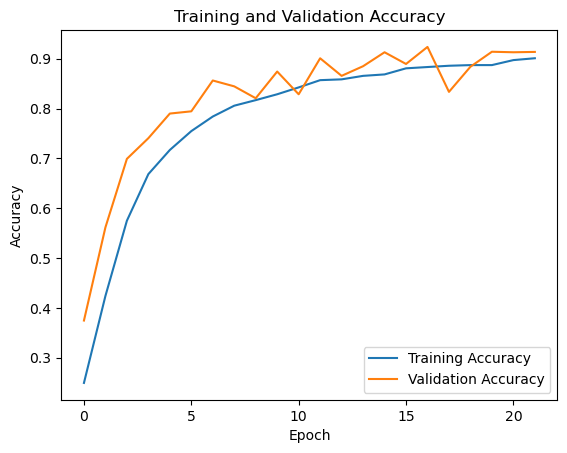

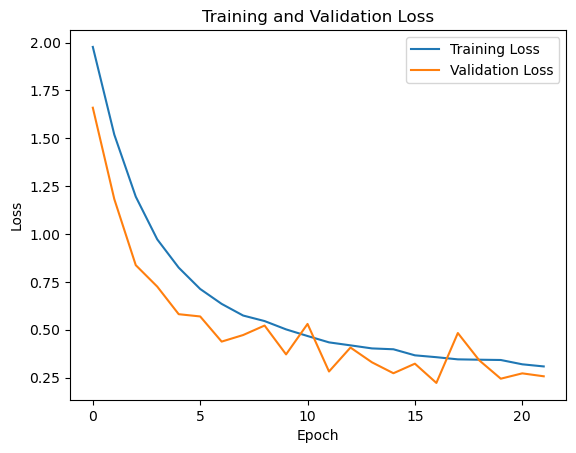

In [150]:
plotAccLoss(history_model_V3_3)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       318
           1       0.80      0.91      0.85       292
           2       0.89      0.87      0.88       264
           3       0.91      0.92      0.92       242
           4       0.95      0.81      0.88       308
           5       0.92      0.84      0.88       334
           6       0.80      0.92      0.86       265
           7       0.97      0.96      0.96       330
           8       0.96      0.99      0.97       300
           9       0.95      0.98      0.97       323

    accuracy                           0.91      2976
   macro avg       0.91      0.91      0.91      2976
weighted avg       0.91      0.91      0.91      2976

Accuracy: 0.9082661290322581
Precision: 0.911693013239302
Recall: 0.9082661290322581
F1 Score: 0.9083656422343932


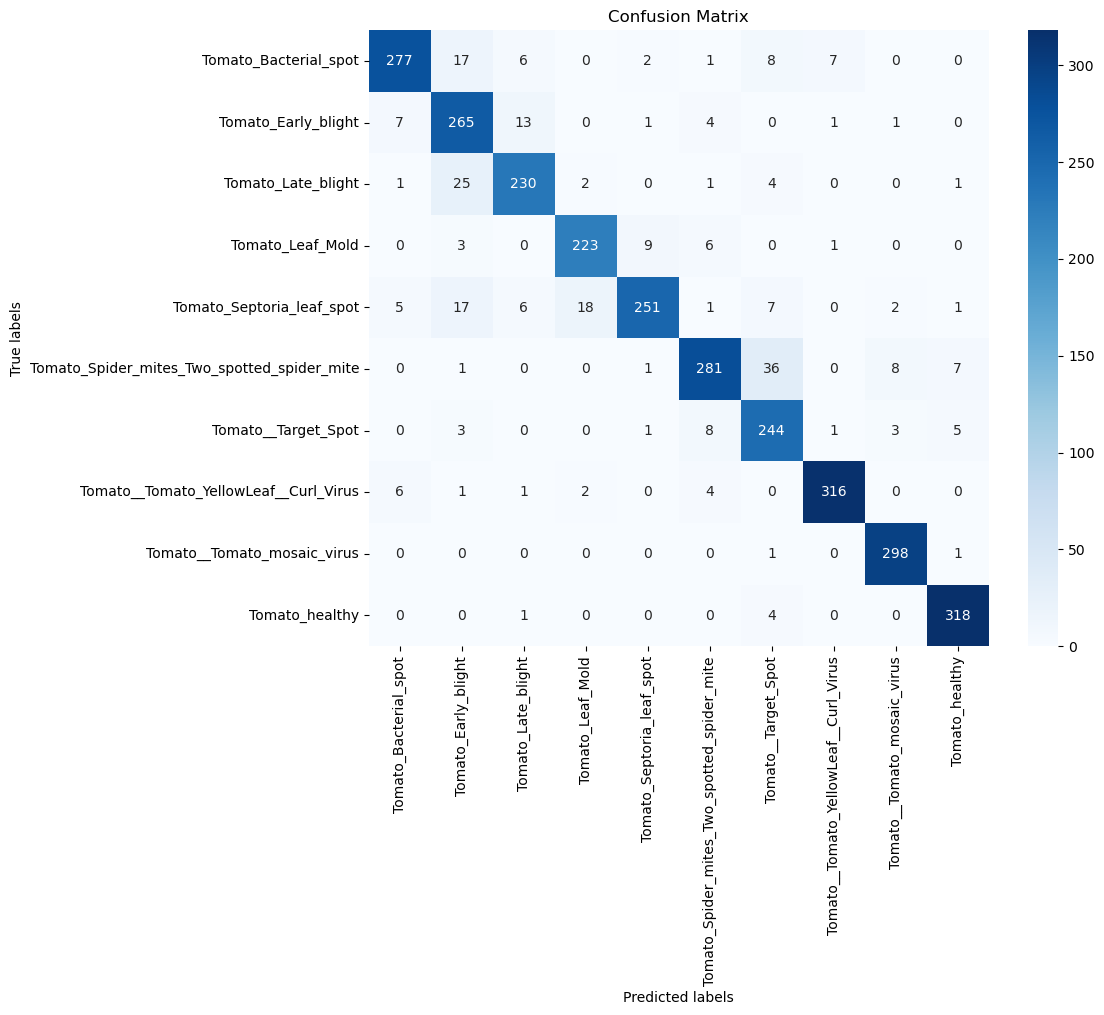

In [151]:
evaluate_model(model_V3_3, test_ds)

# Iterative Model 3.5 -Constant amount of filters

In [139]:
# Define model architecture
model_V3_5 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Assuming number of output classes matches length of class names
])


# Build the model
model_V3_5.build(input_shape = input_shape)

# Compile the model
model_V3_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_V3_5.summary()

# Get model Size
get_model_size(model_V3_5)

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_48 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 sequential_49 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_213 (Conv2D)         (32, 126, 126, 64)        1792      
                                                                 
 max_pooling2d_111 (MaxPooli  (32, 63, 63, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_214 (Conv2D)         (32, 61, 61, 64)          36928     
                                                                 
 max_pooling2d_112 (MaxPooli  (32, 30, 30, 64)         0         
 ng2D)                                               

In [140]:
# Model training
history_model_V3_5=model_V3_5.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=batch_size,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 1/30
732/732 [==============================] - 31s 41ms/step - loss: 1.8992 - accuracy: 0.2946 - val_loss: 1.6035 - val_accuracy: 0.4077
Epoch 2/30
732/732 [==============================] - 29s 40ms/step - loss: 1.2238 - accuracy: 0.5649 - val_loss: 0.8393 - val_accuracy: 0.6869
Epoch 3/30
732/732 [==============================] - 29s 40ms/step - loss: 0.9019 - accuracy: 0.6855 - val_loss: 0.5920 - val_accuracy: 0.7923
Epoch 4/30
732/732 [==============================] - 29s 40ms/step - loss: 0.7108 - accuracy: 0.7512 - val_loss: 0.4877 - val_accuracy: 0.8186
Epoch 5/30
732/732 [==============================] - 29s 40ms/step - loss: 0.5848 - accuracy: 0.7999 - val_loss: 0.4212 - val_accuracy: 0.8500
Epoch 6/30
732/732 [==============================] - 29s 40ms/step - loss: 0.5166 - accuracy: 0.8255 - val_loss: 0.3601 - val_accuracy: 0.8749
Epoch 7/30
732/732 [==============================] - 29s 40ms/step - loss: 0.4603 - accuracy: 0.8433 - val_loss: 0.5975 - val_accuracy:

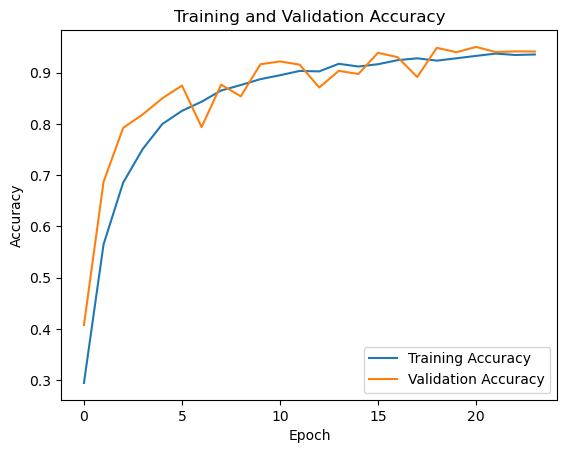

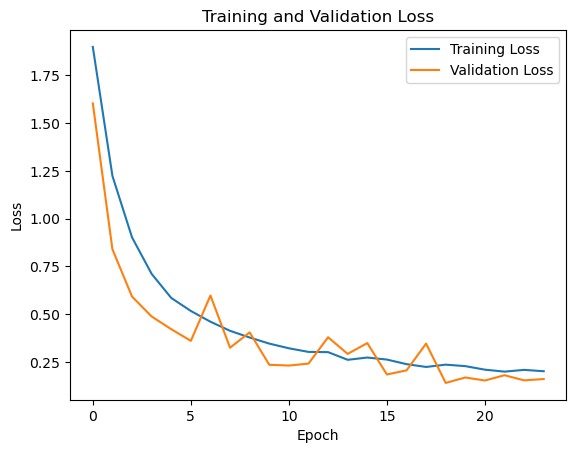

In [141]:
plotAccLoss(history_model_V3_5)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       318
           1       0.92      0.96      0.94       292
           2       0.96      0.89      0.92       264
           3       0.95      0.96      0.96       242
           4       0.93      0.95      0.94       308
           5       0.96      0.91      0.93       334
           6       0.92      0.92      0.92       265
           7       0.98      0.95      0.97       330
           8       0.97      1.00      0.98       300
           9       0.99      0.98      0.99       323

    accuracy                           0.95      2976
   macro avg       0.95      0.95      0.95      2976
weighted avg       0.95      0.95      0.95      2976

Accuracy: 0.949260752688172
Precision: 0.9497833096782919
Recall: 0.949260752688172
F1 Score: 0.9491555500231983


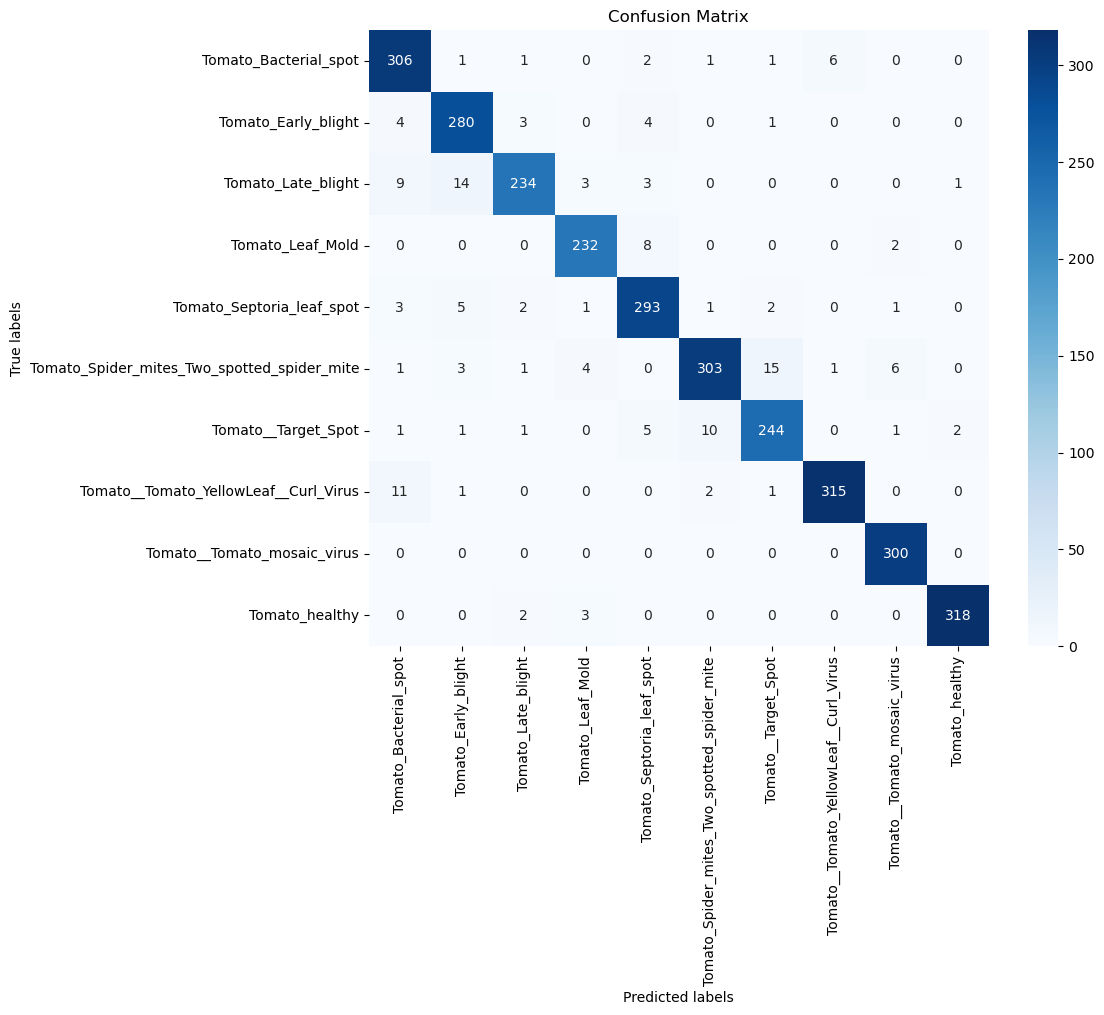

In [142]:
evaluate_model(model_V3_5,test_ds)

# Iterative Model Number 4 - Depthwise Separable Convolution
The aim is to see if similar results can be obtained from the best model with fewer parameters which would increase efficiency.

In [144]:
# Define model architecture
model_V4 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.SeparableConv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.SeparableConv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.SeparableConv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Assuming number of output classes matches length of class names
])

# Build the model
model_V4.build(input_shape = input_shape)

# Compile the model
model_V4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_V4.summary()

# Get model Size
get_model_size(model_V4)

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_48 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 sequential_49 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 separable_conv2d_3 (Separab  (32, 126, 126, 32)       155       
 leConv2D)                                                       
                                                                 
 max_pooling2d_119 (MaxPooli  (32, 63, 63, 32)         0         
 ng2D)                                                           
                                                                 
 separable_conv2d_4 (Separab  (32, 61, 61, 64)         2400      
 leConv2D)                                                       
                                                     

In [145]:
# Model training
history_model_V4=model_V4.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=batch_size,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 1/30
732/732 [==============================] - 42s 56ms/step - loss: 1.9669 - accuracy: 0.2592 - val_loss: 1.5374 - val_accuracy: 0.4271
Epoch 2/30
732/732 [==============================] - 42s 57ms/step - loss: 1.3929 - accuracy: 0.4869 - val_loss: 1.0170 - val_accuracy: 0.6562
Epoch 3/30
732/732 [==============================] - 42s 57ms/step - loss: 1.2046 - accuracy: 0.5552 - val_loss: 1.0660 - val_accuracy: 0.6120
Epoch 4/30
732/732 [==============================] - 42s 57ms/step - loss: 1.1056 - accuracy: 0.5817 - val_loss: 1.2159 - val_accuracy: 0.5788
Epoch 5/30
732/732 [==============================] - 42s 57ms/step - loss: 1.0649 - accuracy: 0.6002 - val_loss: 1.0015 - val_accuracy: 0.6534
Epoch 6/30
732/732 [==============================] - 42s 57ms/step - loss: 0.9939 - accuracy: 0.6246 - val_loss: 0.9106 - val_accuracy: 0.7001
Epoch 7/30
732/732 [==============================] - 42s 57ms/step - loss: 0.9578 - accuracy: 0.6443 - val_loss: 1.2838 - val_accuracy:

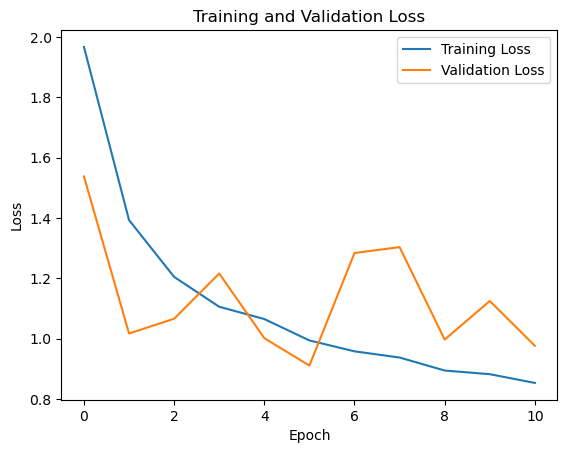

In [146]:
plotAccLoss(history_model_V4)

In [147]:
evaluate_model(model_V4,test_ds)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       318
           1       0.73      0.52      0.61       292
           2       0.65      0.70      0.67       264
           3       0.69      0.73      0.71       242
           4       0.88      0.40      0.55       308
           5       0.61      0.47      0.53       334
           6       0.56      0.46      0.51       265
           7       0.74      0.94      0.83       330
           8       0.85      0.95      0.90       300
           9       0.52      0.99      0.68       323

    accuracy                           0.69      2976
   macro avg       0.71      0.69      0.68      2976
weighted avg       0.72      0.69      0.68      2976

Accuracy: 0.6901881720430108
Precision: 0.7159274056637985
Recall: 0.6901881720430108
F1 Score: 0.6797029962659815


It seems, that despite different iterations with hyper parameter tuning and using pointwise convolution as described in Chapter 7 of Deep Learning with Python, the results seem to be optimal with model 2.

# Ensemble Modelling
Used Model_V25 and Model_V3_1 due to their fairly opposing classification reports. Both models were already trained, thus we simply utilized their predicted outputs, assigning them each equal weightage

In [160]:
def evaluate_ensemble_model(model_a, model_b, test_ds):
    # Get the true labels and predictions for the test dataset
    true_labels = []
    predicted_labels = []
    for images, labels in test_ds:
        pred_a = model_a.predict(images)
        pred_b = model_b.predict(images)
        predictions = 0.5 * (pred_a + pred_b)
        predicted_labels.extend(np.argmax(predictions, axis=1))
        true_labels.extend(labels.numpy())

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    # Print classification report
    print("Classification Report:")
    print(classification_report(true_labels, predicted_labels))

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       318
           1       0.94      0.96      0.95       292
           2       0.94      0.97      0.96       264
           3       0.97      0.99      0.98       242
           4       0.97      0.94      0.95       308
           5       0.97      0.93      0.95       334
           6       0.95      0.94      0.94       265
           7       0.97      0.99      0.98       330
           8       0.96      1.00      0.98       300
           9       0.99      1.00      1.00       323

    accuracy                           0.97      2976
   macro avg       0.97      0.97      0.97      2976
weighted avg       0.97      0.97      0.97      2976

Accuracy: 0.9660618279569892
Precision: 0.9662374816979049
Recall: 0.9660618279569892
F1 Score: 0.9659335273583678


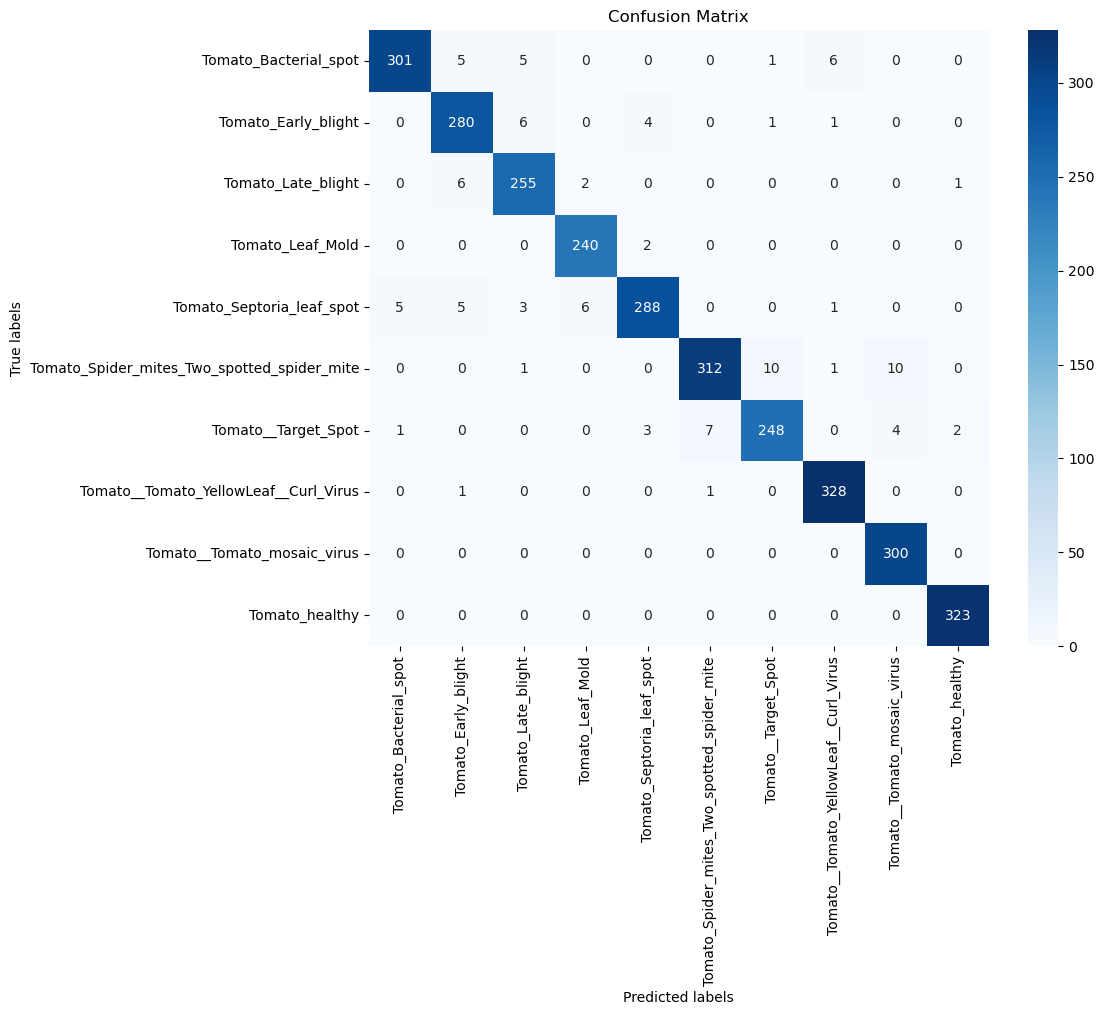

In [161]:
evaluate_ensemble_model(model_V25, model_V3_1, test_ds)

A new high of 96.6% has been achieved with model ensembling.

# Evaluation

| Parameter                     | Value                      |
|-------------------------------|----------------------------|
| Optimization algorithm        | Adam                       |
| Loss function                 | Sparse categorical cross-entropy |
| Batch size                    | 32                         |
| Number of epochs              | 30                         |
| Steps per epoch               | 732 (approx.)              |
| Validation steps              | 91  (approx.)              |
| Activation function for conv layer | ReLU                     |


show example of prediction results of images from the best proposed model

In [167]:
def display_examples(model_a, model_b, test_ds, num_examples=10):
    correct_predictions = 0

    fig, axes = plt.subplots(2, 5, figsize=(20, 8))

    for i, (images, labels) in enumerate(test_ds):
        if i >= num_examples:
            break

        pred_a = model_a.predict(images)
        pred_b = model_b.predict(images)
        predictions = 0.5 * (pred_a + pred_b)
        predicted_label = np.argmax(predictions, axis=1)[0]
        true_label = labels.numpy()[0]
        accuracy = accuracy_score([true_label], [predicted_label])

        # Normalize image pixel values to be in the range [0, 1]
        images = images.numpy()[0] / 255.0

        row_index = i // 5
        col_index = i % 5

        axes[row_index, col_index].imshow(images)
        axes[row_index, col_index].axis('off')
        axes[row_index, col_index].set_title(f"True Label: {class_names[true_label]}\nPredicted Label: {class_names[predicted_label]}\nAccuracy: {accuracy * 100:.2f}%")

        if predicted_label == true_label:
            correct_predictions += 1

    total_accuracy = (correct_predictions / num_examples) * 100
    print(f"Overall accuracy for {num_examples} examples: {total_accuracy:.2f}%")

    plt.tight_layout()
    plt.show()

# Display examples using the ensemble model
display_examples(model_V25, model_V3_1, test_ds, num_examples=10)


Overall accuracy for 10 examples: 100.00%


showcase 4 charts that show the results of static models, existing models and proposed final model for F1,Accuracy,Precision, Recall

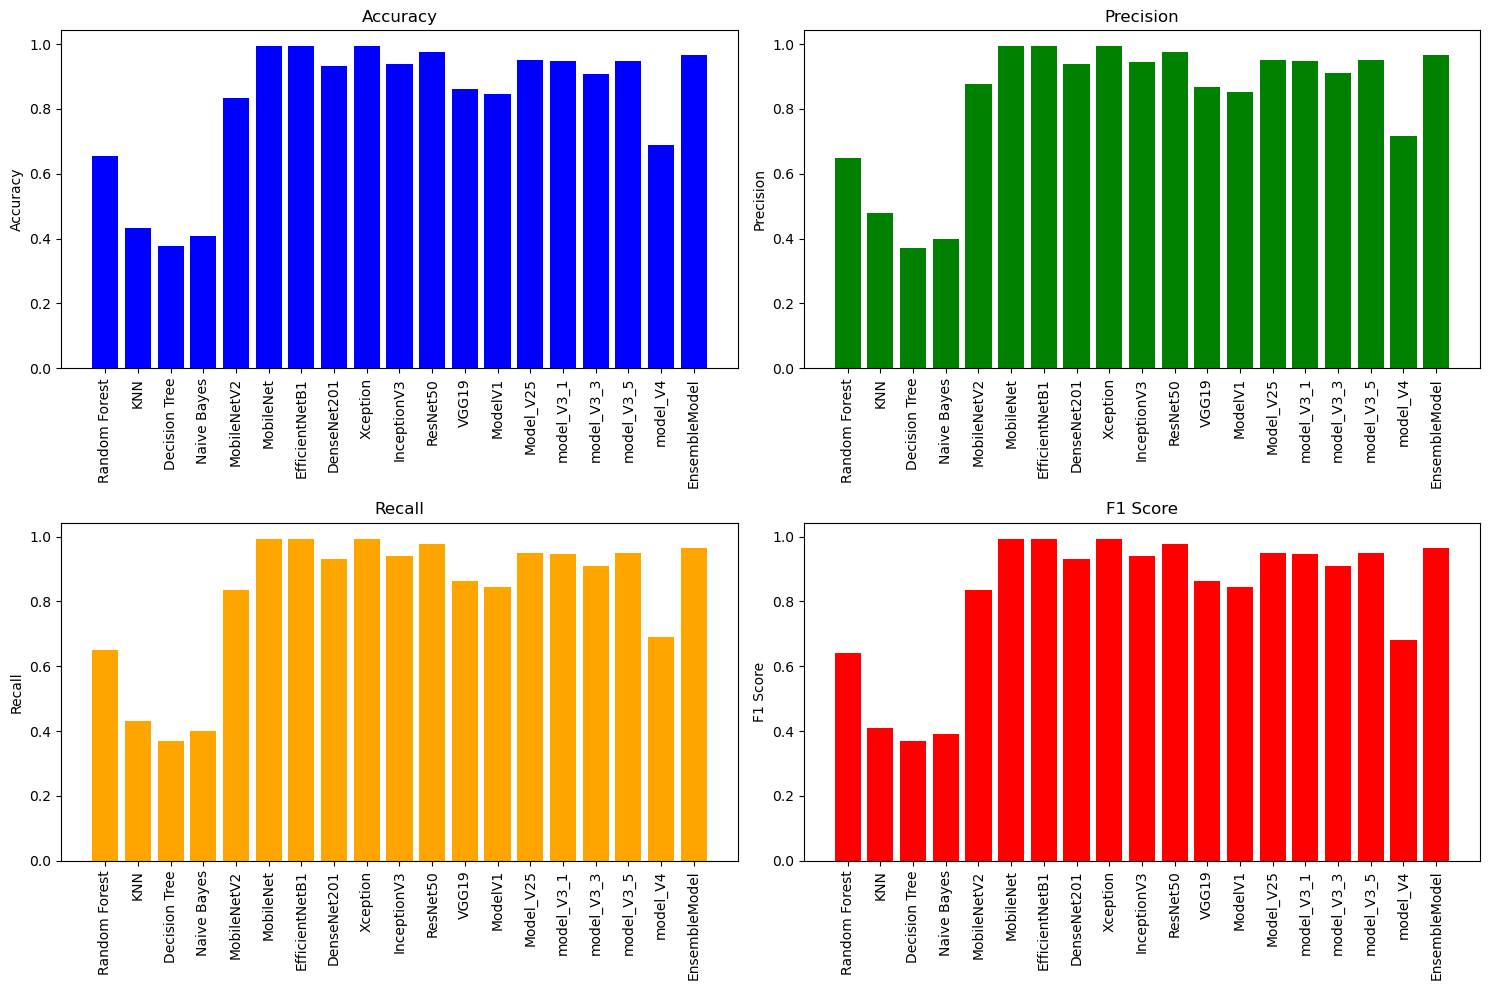

In [169]:
# Model names
models = ['Random Forest', 'KNN', 'Decision Tree', 'Naive Bayes', 'MobileNetV2', 'MobileNet', 'EfficientNetB1', 'DenseNet201', 'Xception', 'InceptionV3', 'ResNet50', 'VGG19', 'ModelV1', 'Model_V25', 'model_V3_1', 'model_V3_3', 'model_V3_5', 'model_V4', 'EnsembleModel']

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Corresponding values for each model and metric
values = {
    'Random Forest': [0.656, 0.65, 0.65, 0.64],
    'KNN': [0.434, 0.48, 0.43, 0.41],
    'Decision Tree': [0.377, 0.37, 0.37, 0.37],
    'Naive Bayes': [0.407, 0.40, 0.40, 0.39],
    'MobileNetV2': [0.834, 0.877, 0.834, 0.834],
    'MobileNet': [0.993, 0.993, 0.993, 0.993],
    'EfficientNetB1': [0.993, 0.993, 0.993, 0.993],
    'DenseNet201': [0.932, 0.939, 0.932, 0.932],
    'Xception': [0.993, 0.993, 0.993, 0.993],
    'InceptionV3': [0.940, 0.946, 0.940, 0.939],
    'ResNet50': [0.976, 0.977, 0.976, 0.976],
    'VGG19': [0.862, 0.867, 0.862, 0.862],
    'ModelV1': [0.846, 0.852, 0.846, 0.845],
    'Model_V25': [0.951, 0.952, 0.951, 0.951],
    'model_V3_1': [0.948, 0.948, 0.948, 0.947],
    'model_V3_3': [0.908, 0.912, 0.908, 0.908],
    'model_V3_5': [0.949, 0.950, 0.949, 0.949],
    'model_V4': [0.690, 0.716, 0.690, 0.680],
    'EnsembleModel': [0.966, 0.966, 0.966, 0.966]
}

# Colors for each metric
colors = ['blue', 'green', 'orange', 'red']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    axs[row, col].bar(models, [values[model][i] for model in models], color=colors[i])
    axs[row, col].set_title(metric)
    axs[row, col].set_xticklabels(models, rotation=90)
    axs[row, col].set_ylabel(metric)

plt.tight_layout()
plt.show()


C:\Users\Harish\AppData\Local\Temp\ipykernel_18284\2195261251.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, col].set_xticklabels(models, rotation=90)


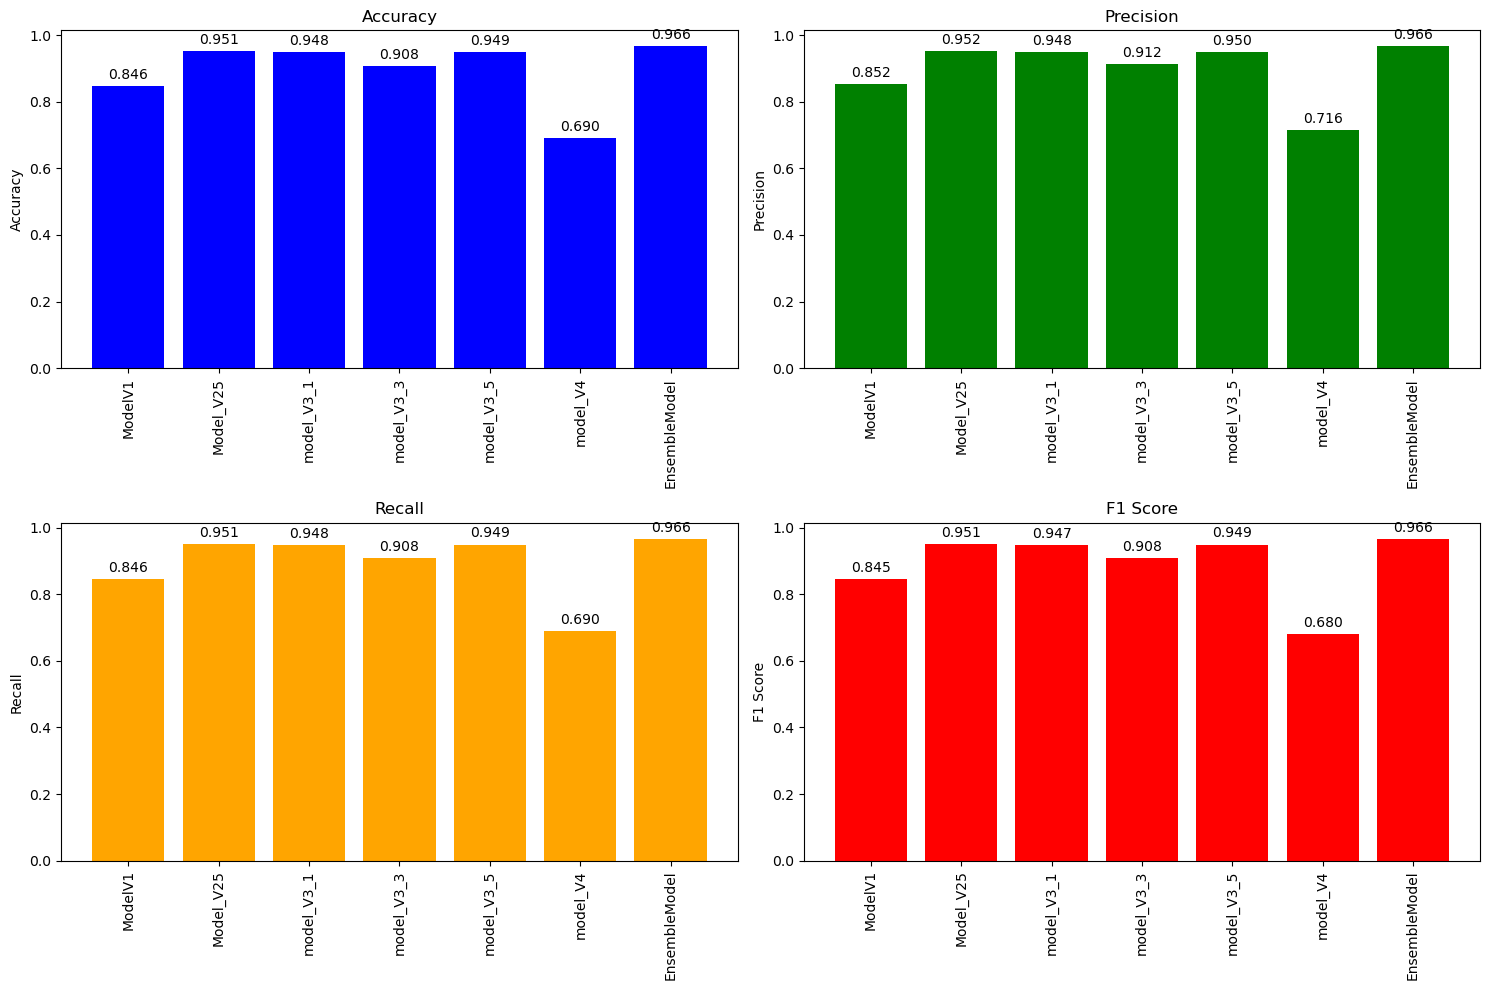

In [3]:
# Model names
models = ['ModelV1', 'Model_V25', 'model_V3_1', 'model_V3_3', 'model_V3_5', 'model_V4', 'EnsembleModel']

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Corresponding values for each model and metric
values = {
    'ModelV1': [0.846, 0.852, 0.846, 0.845],
    'Model_V25': [0.951, 0.952, 0.951, 0.951],
    'model_V3_1': [0.948, 0.948, 0.948, 0.947],
    'model_V3_3': [0.908, 0.912, 0.908, 0.908],
    'model_V3_5': [0.949, 0.950, 0.949, 0.949],
    'model_V4': [0.690, 0.716, 0.690, 0.680],
    'EnsembleModel': [0.966, 0.966, 0.966, 0.966]
}

# Colors for each metric
colors = ['blue', 'green', 'orange', 'red']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    bars = axs[row, col].bar(models, [values[model][i] for model in models], color=colors[i])
    axs[row, col].set_title(metric)
    axs[row, col].set_xticklabels(models, rotation=90)
    axs[row, col].set_ylabel(metric)
    
    # Add values above each bar
    for bar in bars:
        height = bar.get_height()
        axs[row, col].annotate('%.3f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Traditional Models with Proposed Ensemble Model

C:\Users\Harish\AppData\Local\Temp\ipykernel_18284\509254280.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, col].set_xticklabels(models, rotation=90)


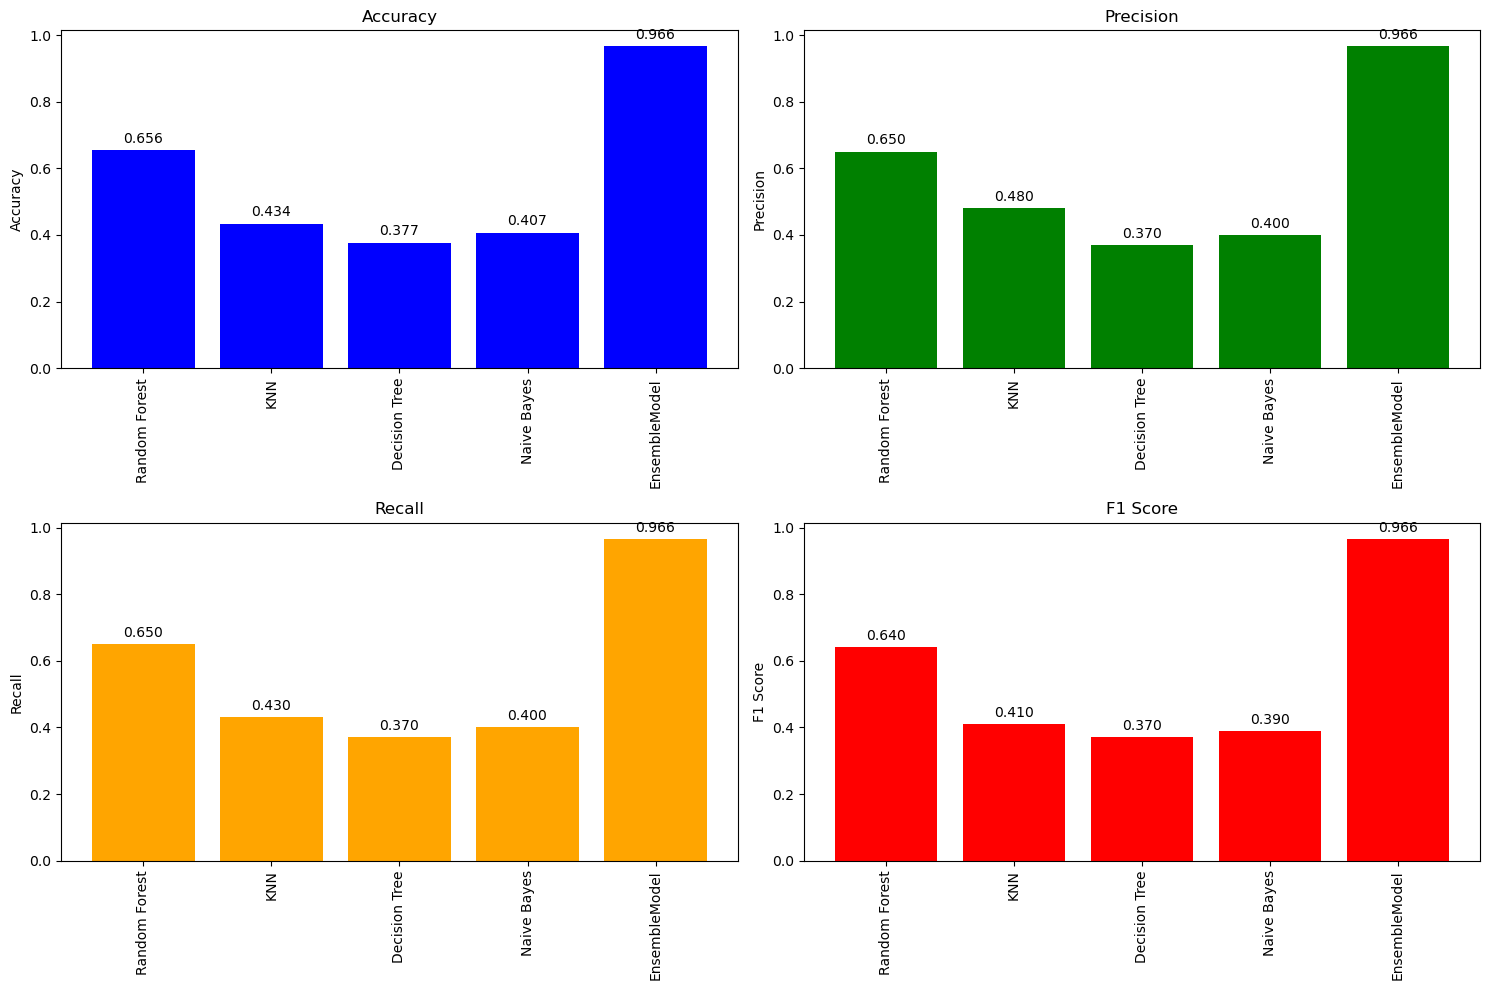

In [4]:
# Model names
models = ['Random Forest', 'KNN', 'Decision Tree', 'Naive Bayes', 'EnsembleModel']

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Corresponding values for each model and metric
values = {
    'Random Forest': [0.656, 0.65, 0.65, 0.64],
    'KNN': [0.434, 0.48, 0.43, 0.41],
    'Decision Tree': [0.377, 0.37, 0.37, 0.37],
    'Naive Bayes': [0.407, 0.40, 0.40, 0.39],
    'EnsembleModel': [0.966, 0.966, 0.966, 0.966]
}

# Colors for each metric
colors = ['blue', 'green', 'orange', 'red']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    bars = axs[row, col].bar(models, [values[model][i] for model in models], color=colors[i])
    axs[row, col].set_title(metric)
    axs[row, col].set_xticklabels(models, rotation=90)
    axs[row, col].set_ylabel(metric)
    
    # Add values above each bar
    for bar in bars:
        height = bar.get_height()
        axs[row, col].annotate('%.3f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Pre-trained models with proposed ensemble model

In [5]:
# Model names
models = ['MobileNetV2', 'MobileNet', 'EfficientNetB1', 'DenseNet201', 'Xception', 'InceptionV3', 'ResNet50', 'VGG19', 'EnsembleModel']

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Corresponding values for each model and metric
values = {
    'MobileNetV2': [0.834, 0.877, 0.834, 0.834],
    'MobileNet': [0.993, 0.993, 0.993, 0.993],
    'EfficientNetB1': [0.993, 0.993, 0.993, 0.993],
    'DenseNet201': [0.932, 0.939, 0.932, 0.932],
    'Xception': [0.993, 0.993, 0.993, 0.993],
    'InceptionV3': [0.940, 0.946, 0.940, 0.939],
    'ResNet50': [0.976, 0.977, 0.976, 0.976],
    'VGG19': [0.862, 0.867, 0.862, 0.862],
    'EnsembleModel': [0.966, 0.966, 0.966, 0.966]
}

# Colors for each metric
colors = ['blue', 'green', 'orange', 'red']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    bars = axs[row, col].bar(models, [values[model][i] for model in models], color=colors[i])
    axs[row, col].set_title(metric)
    axs[row, col].set_xticklabels(models, rotation=90)
    axs[row, col].set_ylabel(metric)
    
    # Add values above each bar
    for bar in bars:
        height = bar.get_height()
        axs[row, col].annotate('%.3f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


C:\Users\Harish\AppData\Local\Temp\ipykernel_18284\2825082924.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, col].set_xticklabels(models, rotation=90)
